# Lending CLub Case Study

### Import Libraries

In [262]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [263]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

### Read csv file

In [265]:
df1 = pd.read_csv("loan.csv")

print(df1.shape)
print(df1.dtypes)

(39717, 111)
id                                  int64
member_id                           int64
loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
sub_grade                          object
emp_title                          object
emp_length                         object
home_ownership                     object
annual_inc                        float64
verification_status                object
issue_d                            object
loan_status                        object
pymnt_plan                         object
url                                object
desc                               object
purpose                            object
title                              object
zip_code                           object
addr_state           

#### Confirm if id has unique values

In [267]:
repeated_values = df1['id'].value_counts()
repeated_values = repeated_values[repeated_values>1]
if repeated_values.empty:
    print("id has Unique values")
else:
    print("id has duplicate values")

id has Unique values


#### Confirm if member id has unique values

In [269]:
null_values = df1[df1['member_id'].isnull()]
repeated_values = df1['id'].value_counts()
repeated_values = repeated_values[repeated_values>1]
if repeated_values.empty:
    print("member_id has Unique values")
else:
    print("member_id has duplicate values")

member_id has Unique values


## Univariate Analysis

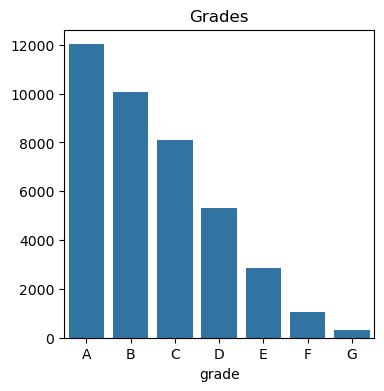

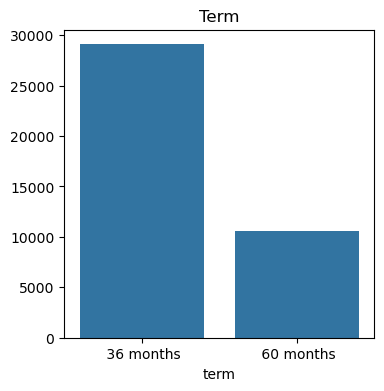

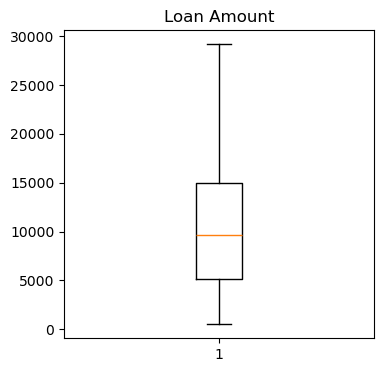

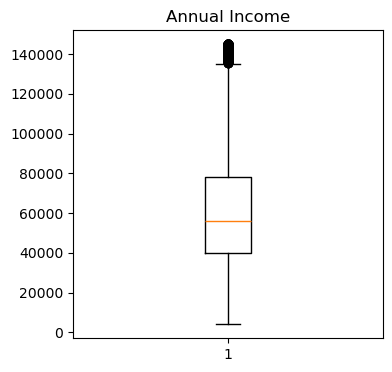

Maximum annual income is : 6000000.0


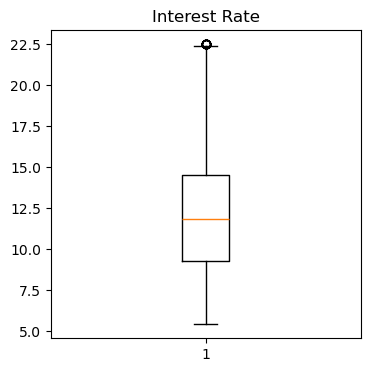

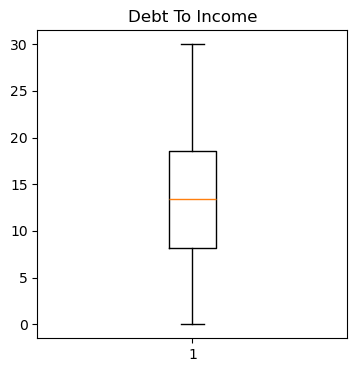

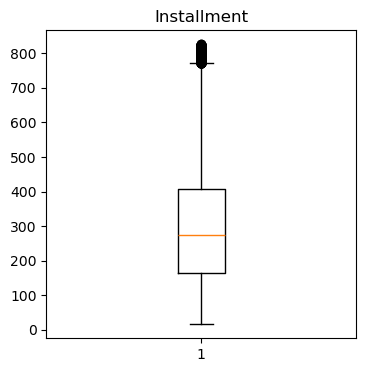

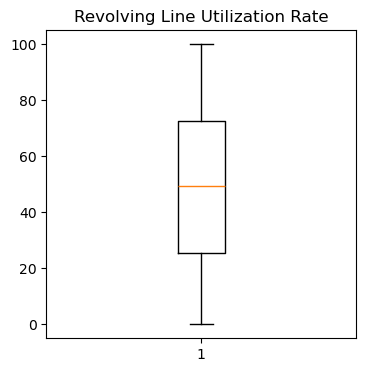

In [271]:
uni_df = df1.copy()
df1['int_rate'].describe()
uni_df['int_rate'].describe()

# Convert Strung into float data types
uni_df['int_rate'] = uni_df['int_rate'].str.replace("%","").astype(float)
uni_df['revol_util'] = uni_df['revol_util'].str.replace("%","").astype(float)


# Function to remove outliers
def remove_outliers(df, column_name):
    """
    Removes outliers from a specified column in a dataframe using the IQR method.

    Parameters:
    df (pd.DataFrame): The input dataframe.
    column_name (str): The name of the column to remove outliers from.

    Returns:
    pd.DataFrame: A new dataframe with outliers removed.
    """
    column = df[column_name]

    # Calculate the IQR
    Q1 = column.quantile(0.25)  # 25th percentile
    Q3 = column.quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1

    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out rows where the column's values fall outside of the IQR bounds
    df_cleaned = df[(column >= lower_bound) & (column <= upper_bound)]

    return df_cleaned[column_name]


# Barplot for Grade
plt.figure(figsize=(4,4))
sns.barplot(x=uni_df['grade'].value_counts().sort_index().index, y=uni_df['grade'].value_counts().values)
plt.title('Grades')
plt.show()

# Barplot for Term
plt.figure(figsize=(4,4))
sns.barplot(x=uni_df['term'].value_counts().sort_index().index, y=uni_df['term'].value_counts().values)
plt.title('Term')
plt.show()


# Boxplot for loan_amnt
plt.figure(figsize=(4,4))
plt.boxplot(remove_outliers(uni_df, 'loan_amnt'))
plt.title('Loan Amount')
plt.show()

#Boxplot for annual income
plt.figure(figsize=(4,4))
plt.boxplot(remove_outliers(uni_df, 'annual_inc'))
plt.title('Annual Income')
plt.show()

print('Maximum annual income is :', uni_df['annual_inc'].max())

#Boxplot for interest rate
plt.figure(figsize=(4,4))
plt.boxplot(remove_outliers(uni_df, 'int_rate'))
plt.title('Interest Rate')
plt.show()

#Boxplot for dti
plt.figure(figsize=(4,4))
plt.boxplot(remove_outliers(uni_df, 'dti'))
plt.title('Debt To Income')
plt.show()

#Boxplot for installment
plt.figure(figsize=(4,4))
plt.boxplot(remove_outliers(uni_df, 'installment'))
plt.title('Installment')
plt.show()

#Boxplot for revolving line utilization rate
plt.figure(figsize=(4,4))
plt.boxplot(remove_outliers(uni_df, 'revol_util'))
plt.title('Revolving Line Utilization Rate')
plt.show()

## Conclusion on Univariate Analysis

##### Company tends to grant more loans to hhigh quality borrower
##### Shorter duration loans are more popular tthan longe duration

##### Majority of borrowers tend to choose loan amounts ranging from \$5k to \$1k

##### Annual income of borrowers is majorly concentrated between \$4 k to \$8 range


##### Nearly all the borrowers receive interest rate between 9 to 1%

##### Average Debt to Income ratio of borrowers is \~1%

##### Most of the borrowers have installments ranging froUSD \$1 to 400
##### Borrowers on average utilize 50% of their revolving ccredi lline00

## Bivariate and Multivariate Analysis to find drivers of Default and Recoveries

#### Exclude ‘Current’ Loans and calculate overall default rate

##### We will only analyze loans that are either charged off or paid off. Because Current loans don’t reflect the eventual quality of loan until it is either paid off or charged off

In [275]:
df2 = df1[df1['loan_status'].isin(['Charged Off', 'Fully Paid'])]
print(df2.shape)
print(df2['loan_status'].value_counts())
print("Overall Default Rate is " + str(round(df2[df2[['loan_status']]=='Charged Off']['loan_status'].count() / df2['loan_status'].count() *100,1)) + "%")

(38577, 111)
loan_status
Fully Paid     32950
Charged Off     5627
Name: count, dtype: int64
Overall Default Rate is 14.6%


## Default Rate by Grade

##### Grade - Defualt Rate on Loan Count

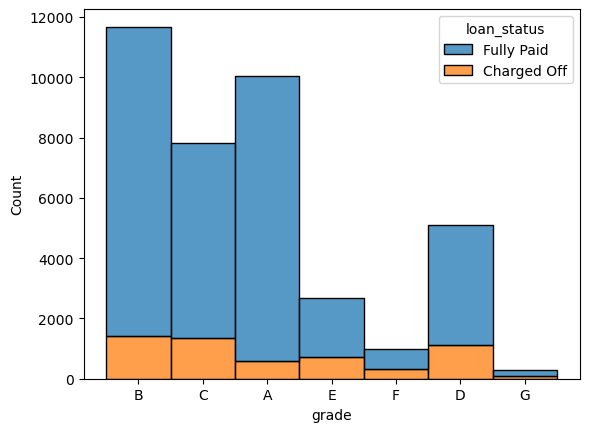


Loan Status by Loan Count

grade  loan_status
A      Charged Off      602
       Fully Paid      9443
B      Charged Off     1425
       Fully Paid     10250
C      Charged Off     1347
       Fully Paid      6487
D      Charged Off     1118
       Fully Paid      3967
E      Charged Off      715
       Fully Paid      1948
F      Charged Off      319
       Fully Paid       657
G      Charged Off      101
       Fully Paid       198
Name: id, dtype: int64

Default Rate (in percentage)

grade  grade
A      A         5.993031
B      B        12.205567
C      C        17.194281
D      D        21.986234
E      E        26.849418
F      F        32.684426
G      G        33.779264
Name: id, dtype: float64


<Axes: xlabel='grade,grade'>

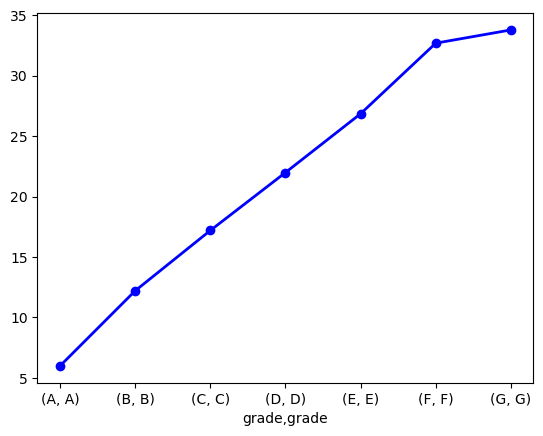

In [278]:
temp = df2[['id', 'grade', 'loan_status', 'loan_amnt']]
sns.histplot(data=temp, x='grade', hue='loan_status', multiple='stack', stat='count')
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['grade','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('grade').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

##### Grade - Default Rate on Loan Amount

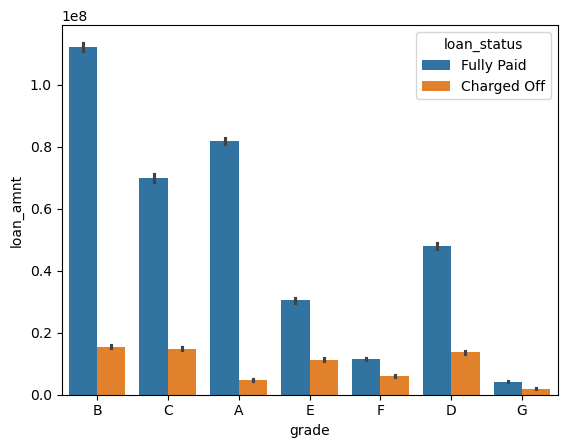


Loan Status by Loan Amount

grade  loan_status
A      Charged Off      4695550
       Fully Paid      81879875
B      Charged Off     15540725
       Fully Paid     112122875
C      Charged Off     14876900
       Fully Paid      69851875
D      Charged Off     13644800
       Fully Paid      48075750
E      Charged Off     11332625
       Fully Paid      30423525
F      Charged Off      6147950
       Fully Paid      11513000
G      Charged Off      1872825
       Fully Paid       4182825
Name: loan_amnt, dtype: int64

Default Rate (in percentage)

grade  grade
A      A         5.423652
B      B        12.173184
C      C        17.558262
D      D        22.107386
E      E        27.140014
F      F        34.810981
G      G        30.926903
Name: loan_amnt, dtype: float64


<Axes: xlabel='grade,grade'>

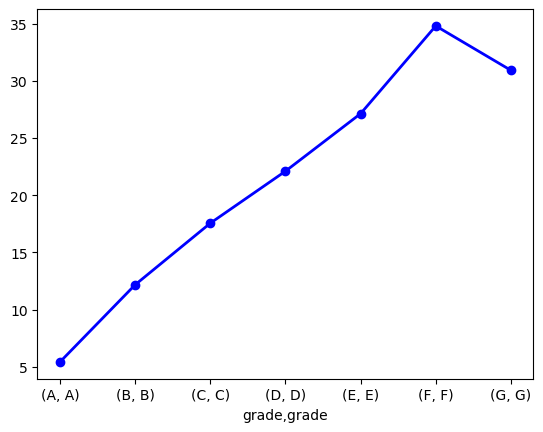

In [280]:
temp = df2[['id', 'grade', 'loan_status', 'loan_amnt']]
sns.barplot(data=temp, x='grade', hue='loan_status', y='loan_amnt', estimator='sum')
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['grade','loan_status'])['loan_amnt'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('grade').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

## Conclusion on Grade

##### Lower Grade Borrowers are more likely to make defaults

##### It can be concluded that Grade is the primary driver that drives loan performance

## Default Rate by Term

##### Term - Defualt Rate on Loan Count

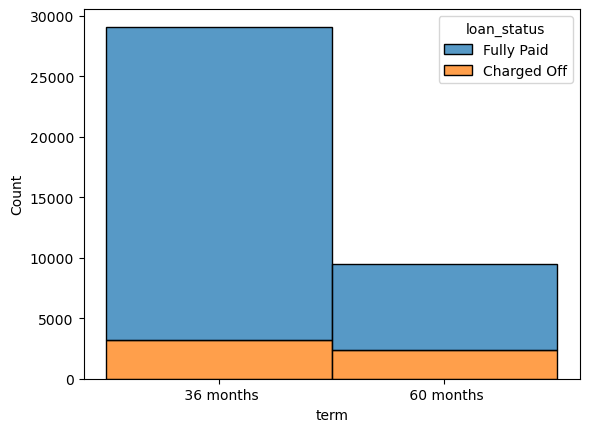


Loan Status by Loan Count

term       loan_status
36 months  Charged Off     3227
           Fully Paid     25869
60 months  Charged Off     2400
           Fully Paid      7081
Name: id, dtype: int64

Default Rate (in percentage)

term       term     
36 months  36 months    11.090872
60 months  60 months    25.313785
Name: id, dtype: float64


In [284]:
temp = df2[['id', 'term', 'loan_status', 'loan_amnt']]
sns.histplot(data=temp, x='term', hue='loan_status', multiple='stack', stat='count')
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['term','loan_status'])['id'].count()
loan_percentage = loan_count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

##### Term - Default Rate on Loan Amount

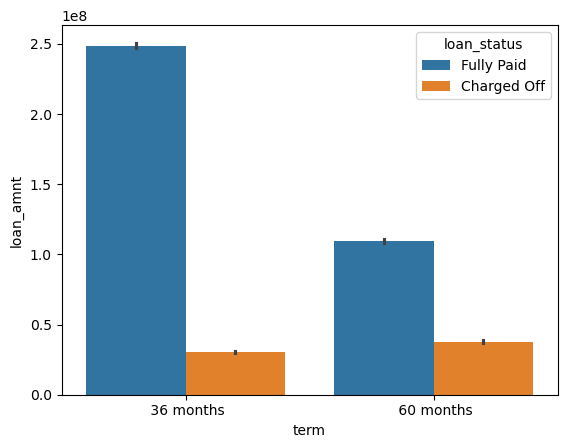


Loan Status by Loan Amount

term       loan_status
36 months  Charged Off     30297400
           Fully Paid     248818675
60 months  Charged Off     37813975
           Fully Paid     109231050
Name: loan_amnt, dtype: int64

Default Rate (in percentage)

term       term     
36 months  36 months    10.854767
60 months  60 months    25.715916
Name: loan_amnt, dtype: float64


In [286]:
temp = df2[['id', 'term', 'loan_status', 'loan_amnt']]
sns.barplot(data=temp, x='term', hue='loan_status', y='loan_amnt', estimator='sum')
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['term','loan_status'])['loan_amnt'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('term').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

## Conclusion on Term

##### Default rates are noticeably higher in 5 yr term bucket compared to 3 yr bucket

##### But nothing can be concluded without analyzing the composition of term bucketse

## Relationship between Term and Grade

##### Term - Grade Relation by Loan Count

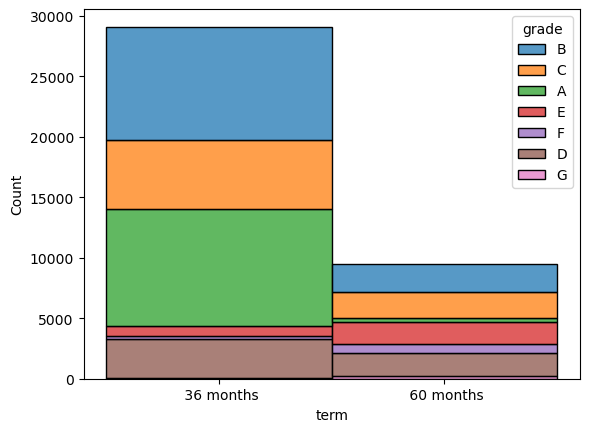


Composition of Term Buckets by Loan Count

term       grade
36 months  A        9650
           B        9331
           C        5749
           D        3231
           E         868
           F         211
           G          56
60 months  A         395
           B        2344
           C        2085
           D        1854
           E        1795
           F         765
           G         243
Name: id, dtype: int64

Composition of Term Buckets by Loan Count Percentage

term       term       grade
36 months  36 months  A        33.166071
                      B        32.069700
                      C        19.758730
                      D        11.104619
                      E         2.983228
                      F         0.725186
                      G         0.192466
60 months  60 months  A         4.166227
                      B        24.723130
                      C        21.991351
                      D        19.554899
                      E        1

In [290]:
temp = df2[['id', 'term', 'grade', 'loan_status', 'loan_amnt']]
sns.histplot(data=temp, x='term', hue='grade', multiple='stack', stat='count')
plt.show()

# Term - Grade composition by loan count
loan_count = temp.groupby(['term','grade'])['id'].count()
loan_percentage = loan_count.groupby('term').apply(lambda x: 100 * x / float(x.sum()))
print('\033[1;4m' + '\nComposition of Term Buckets by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nComposition of Term Buckets by Loan Count Percentage\n' + '\033[0m')
print(loan_percentage)

##### Term - Grade Relation by Loan Amount

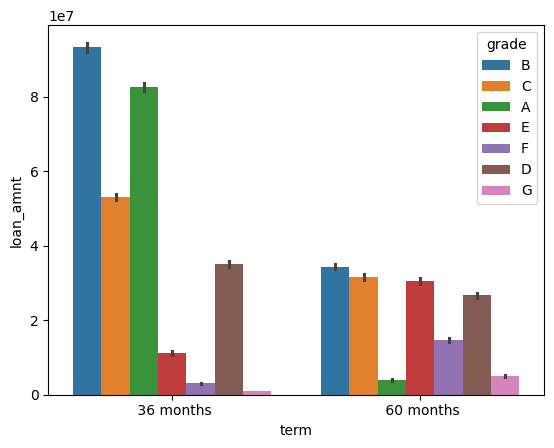


Composition of Term Buckets by Loan Amount

term       grade
36 months  A        82564225
           B        93258450
           C        53053675
           D        35059550
           E        11161975
           F         3045225
           G          972975
60 months  A         4011200
           B        34405150
           C        31675100
           D        26661000
           E        30594175
           F        14615725
           G         5082675
Name: loan_amnt, dtype: int64

Composition of Term Buckets by Loan Amount Percentage

term       term       grade
36 months  36 months  A        29.580605
                      B        33.412067
                      C        19.007746
                      D        12.560921
                      E         3.999044
                      F         1.091025
                      G         0.348592
60 months  60 months  A         2.727872
                      B        23.397697
                      C        21.541089
        

In [292]:
temp = df2[['id', 'term', 'grade', 'loan_status', 'loan_amnt']]
sns.barplot(data=temp, x='term', hue='grade', y='loan_amnt', estimator='sum')
plt.show()

# Term - Grade composition by loan amount
loan_amnt = temp.groupby(['term','grade'])['loan_amnt'].sum()
loan_percentage = loan_amnt.groupby('term').apply(lambda x: 100 * x / float(x.sum()))
print('\033[1;4m' + '\nComposition of Term Buckets by Loan Amount\n' + '\033[0m')
print(loan_amnt)
print('\033[1;4m' + '\nComposition of Term Buckets by Loan Amount Percentage\n' + '\033[0m')
print(loan_percentage)

## Conclusion on relationship between Term and Grade

##### Lower Grade Borrowers are more likely to make defaults

##### 5 year loans have higher default rates than 3 year loans

##### It is also found that 5 year loan has much higher composition of lower grade loans

##### Hence it can be concluded that Grade is the primary driver that drives loan performance

## Default Rate by Interest Rate

##### Interest Rate - Defualt Rate on Loan Count

id             0
int_rate       0
loan_status    0
loan_amnt      0
dtype: int64

Variable Statistics

count    38512.000000
mean        11.913126
std          3.664993
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         22.480000
Name: int_rate, dtype: float64


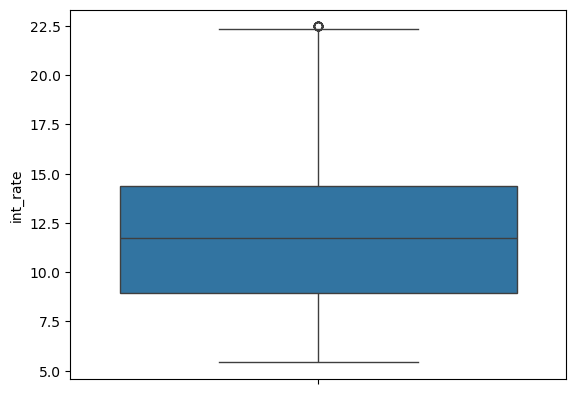

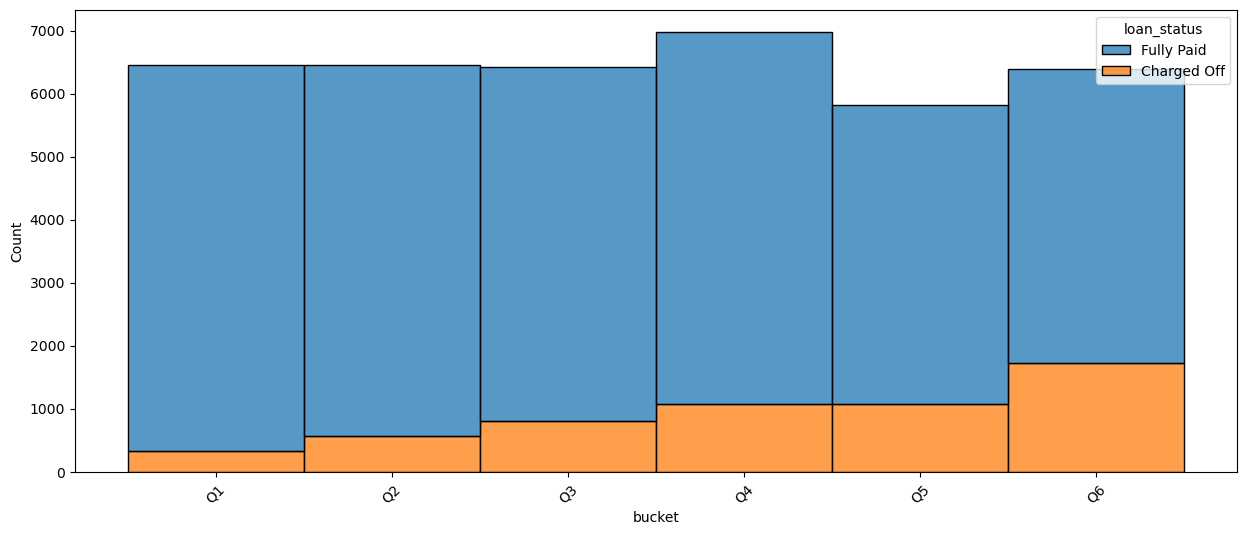

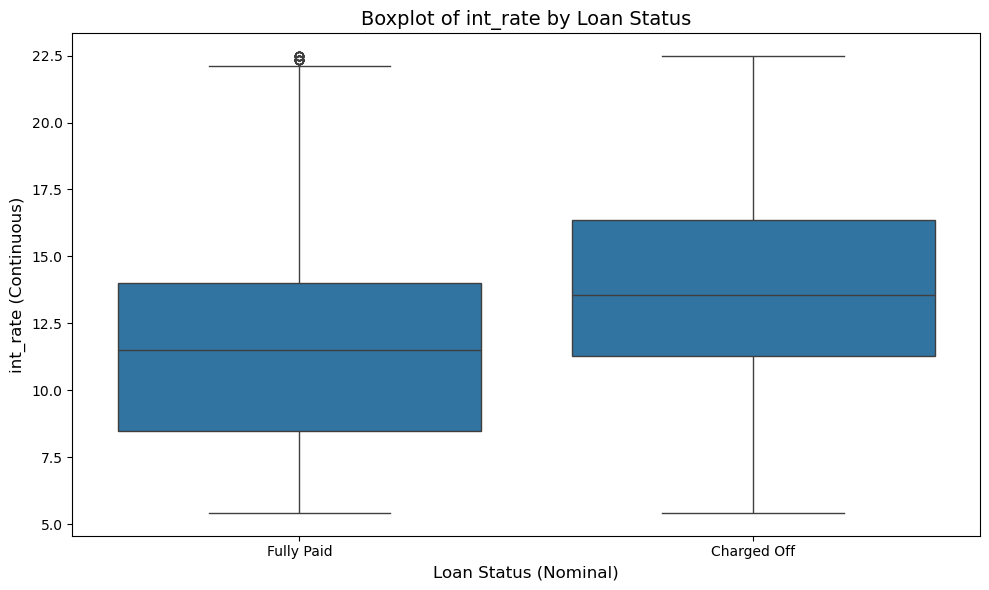


Loan Status by Loan Count

bucket  loan_status
Q1      Charged Off     333
        Fully Paid     6116
Q2      Charged Off     567
        Fully Paid     5881
Q3      Charged Off     808
        Fully Paid     5612
Q4      Charged Off    1083
        Fully Paid     5898
Q5      Charged Off    1071
        Fully Paid     4745
Q6      Charged Off    1735
        Fully Paid     4663
Name: id, dtype: int64

Default Rate (in percentage)

bucket  bucket
Q1      Q1         5.163591
Q2      Q2         8.793424
Q3      Q3        12.585670
Q4      Q4        15.513537
Q5      Q5        18.414718
Q6      Q6        27.117849
Name: id, dtype: float64


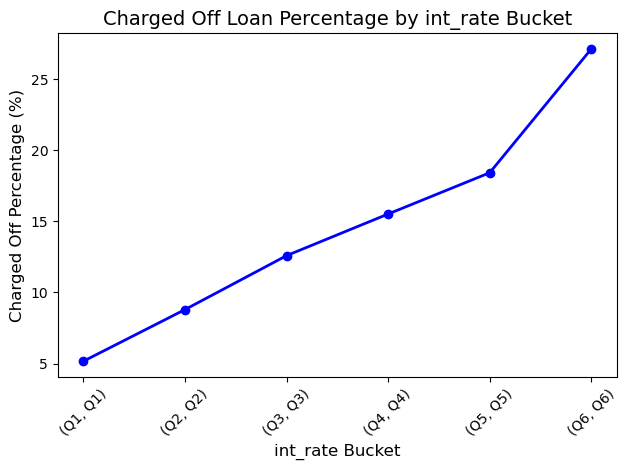


Bin Ranges:
Bucket 1: 5.42 to 7.66
Bucket 2: 7.66 to 10.36
Bucket 3: 10.36 to 11.71
Bucket 4: 11.71 to 13.49
Bucket 5: 13.49 to 15.62
Bucket 6: 15.62 to 22.48


In [296]:
temp = df2[['id', 'int_rate', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())
temp['int_rate'] = temp['int_rate'].str.replace("%","").astype(float)

# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['int_rate'].quantile(0.25)  # 25th percentile
Q3 = temp['int_rate'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['int_rate'] >= lower_bound) & (temp['int_rate'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['int_rate'].describe())

sns.boxplot(temp['int_rate'])

# Create 4 buckets based on quartiles (percentile-based)
temp['bucket'], bin_intervals = pd.qcut(temp['int_rate'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)

# visualisation
plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='bucket', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Boxplot of annual income by loan status
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='int_rate', data=temp)

# Set labels and title
plt.xlabel('Loan Status (Nominal)', fontsize=12)
plt.ylabel('int_rate (Continuous)', fontsize=12)
plt.title('Boxplot of int_rate by Loan Status', fontsize=14)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['bucket','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'income_bucket' values
plt.xlabel('int_rate Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by int_rate Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

##### Interest Rate - Default Rate on Loan Amount

id             0
int_rate       0
loan_status    0
loan_amnt      0
dtype: int64

Variable Statistics

count    38512.000000
mean        11.913126
std          3.664993
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         22.480000
Name: int_rate, dtype: float64


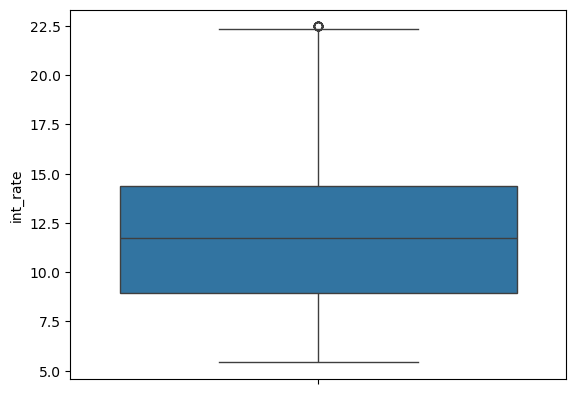

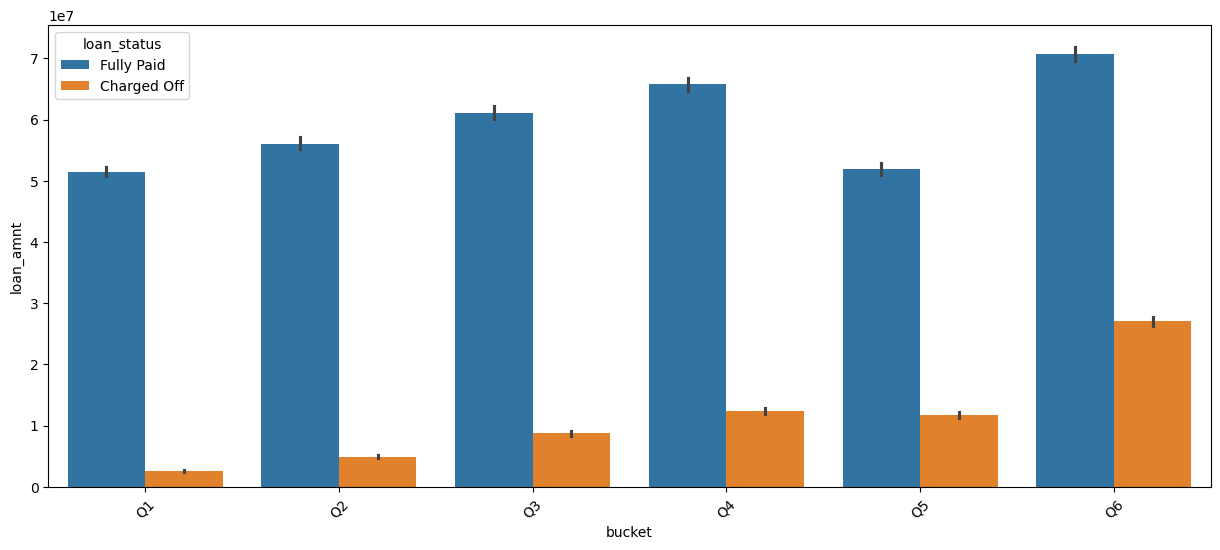


Loan Status by Loan Amount

bucket  loan_status
Q1      Charged Off     250008655
        Fully Paid     4439805713
Q2      Charged Off     372709355
        Fully Paid     3745955197
Q3      Charged Off     538498629
        Fully Paid     3745943374
Q4      Charged Off     703588745
        Fully Paid     3802067150
Q5      Charged Off     697352416
        Fully Paid     2970774353
Q6      Charged Off    1336389166
        Fully Paid     3429082770
Name: id, dtype: int64

Default Rate (in percentage)

bucket  bucket
Q1      Q1         5.330886
Q2      Q2         9.049277
Q3      Q3        12.568699
Q4      Q4        15.615679
Q5      Q5        19.011132
Q6      Q6        28.043165
Name: id, dtype: float64


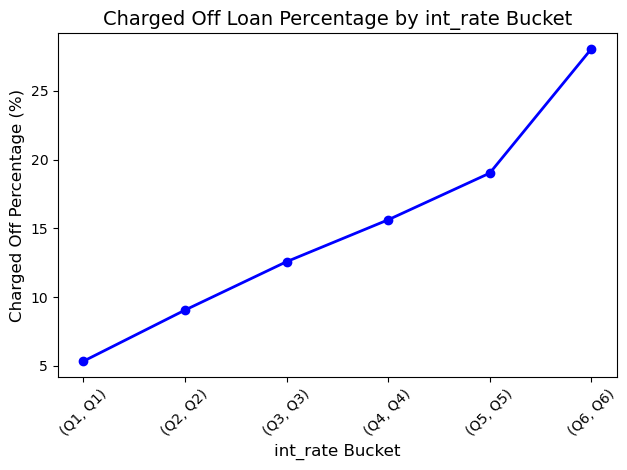


Bin Ranges:
Bucket 1: 5.42 to 7.66
Bucket 2: 7.66 to 10.36
Bucket 3: 10.36 to 11.71
Bucket 4: 11.71 to 13.49
Bucket 5: 13.49 to 15.62
Bucket 6: 15.62 to 22.48


In [298]:
temp = df2[['id', 'int_rate', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())
temp['int_rate'] = temp['int_rate'].str.replace("%","").astype(float)

# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['int_rate'].quantile(0.25)  # 25th percentile
Q3 = temp['int_rate'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['int_rate'] >= lower_bound) & (temp['int_rate'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['int_rate'].describe())

sns.boxplot(temp['int_rate'])

# Create 4 buckets based on quartiles (percentile-based)
temp['bucket'], bin_intervals = pd.qcut(temp['int_rate'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)


plt.figure(figsize=(15,6))
sns.barplot(data=temp, x='bucket', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['bucket','loan_status'])['id'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'income_bucket' values
plt.xlabel('int_rate Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by int_rate Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

## Conclusion on Interest Rate

##### It can be safely concluded that loans with higher interest rates are more likely to make default

##### It also indicates that lower grade loans must be charged with higher interest rates to compensate for higher risk

## Relation between Grade and Interest Rate

##### Grade - Interest Rate Relation by Loan Count

id             0
grade          0
int_rate       0
loan_status    0
loan_amnt      0
dtype: int64


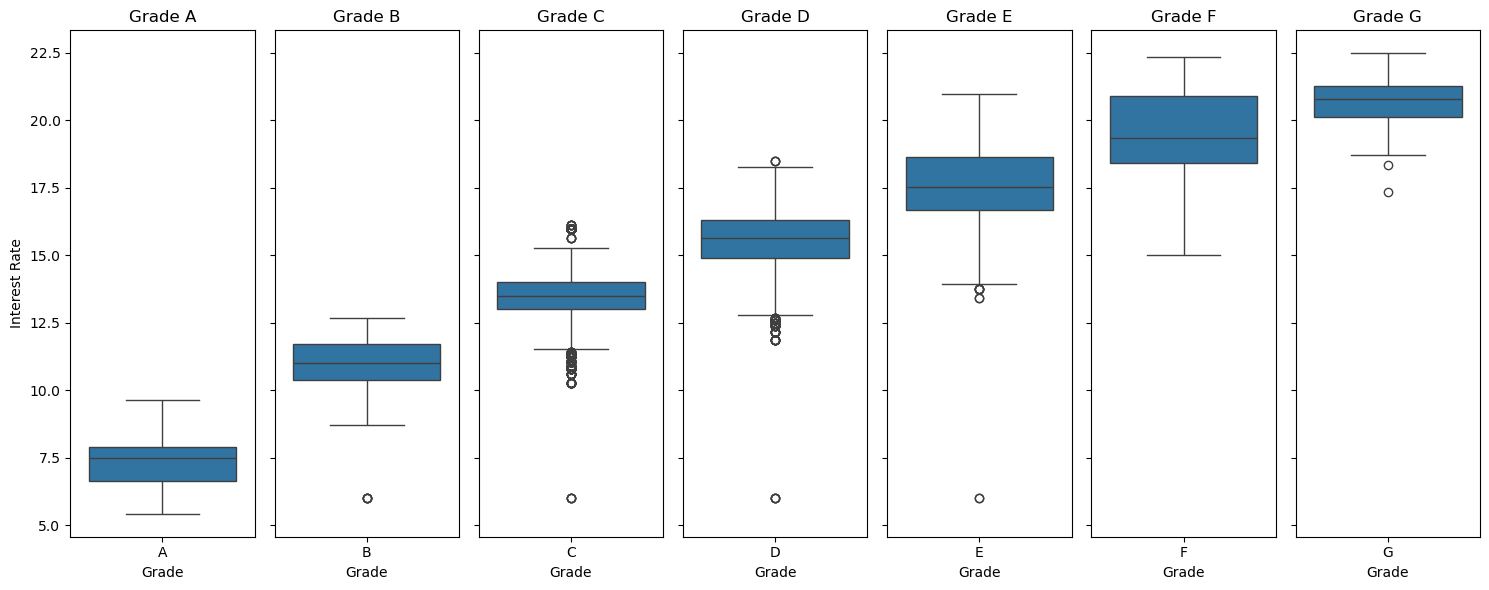

In [302]:
temp = df2[['id', 'grade', 'int_rate', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())
temp['int_rate'] = temp['int_rate'].str.replace("%","").astype(float)

# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['int_rate'].quantile(0.25)  # 25th percentile
Q3 = temp['int_rate'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['int_rate'] >= lower_bound) & (temp['int_rate'] <= upper_bound)]

# Define the number of unique grades
grades = np.sort(temp['grade'].unique())

# Create subplots, one for each grade
fig, axes = plt.subplots(nrows=1, ncols=len(grades), figsize=(15, 6), sharey=True)

# Loop through the grades and create a boxplot for each grade in a separate subplot
for i, grade in enumerate(grades):
    sns.boxplot(x='grade', y='int_rate', data=temp[temp['grade'] == grade], ax=axes[i])
    axes[i].set_title(f"Grade {grade}")
    axes[i].set_xlabel('Grade')
    axes[i].set_ylabel('Interest Rate')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

## Conclusion on relationship between Grade and Interest Rate

##### Lower Grade loans are usually offered higher interest rates to compensate for higher credit risk

## Default Rate by Annual Income

##### Annual Income - Defualt Rate on Loan Count

id             0
annual_inc     0
loan_status    0
loan_amnt      0
dtype: int64

Variable Statistics

count     36815.000000
mean      61218.193490
std       28224.583784
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145000.000000
Name: annual_inc, dtype: float64


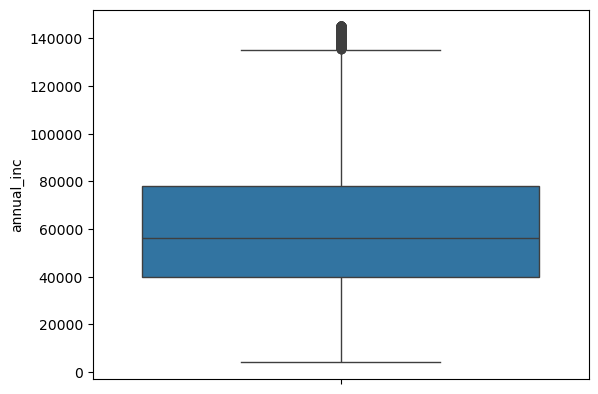

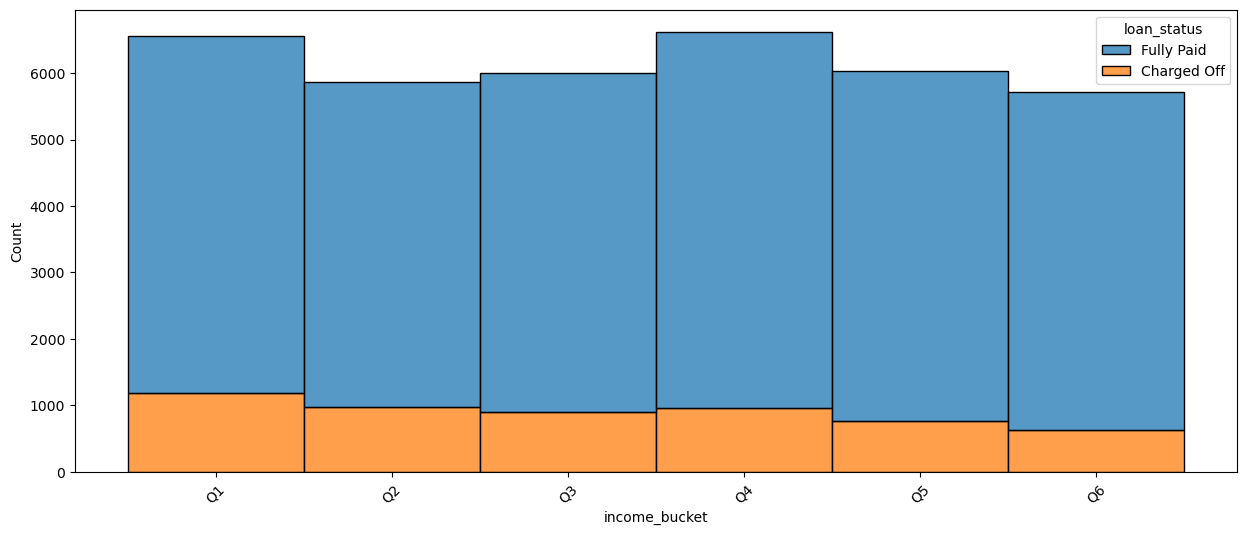

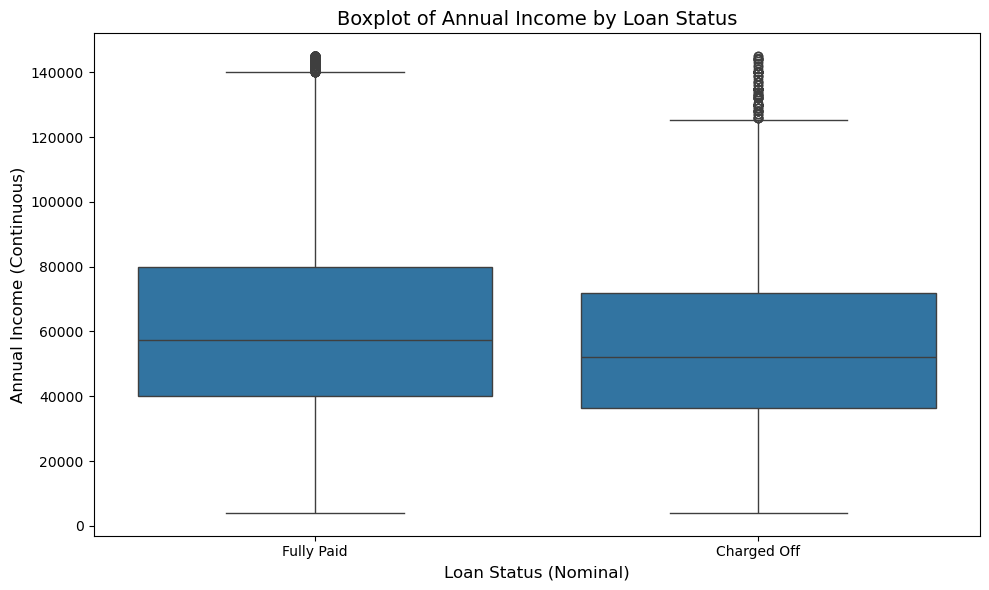


Loan Status by Loan Count

income_bucket  loan_status
Q1             Charged Off    1186
               Fully Paid     5375
Q2             Charged Off     981
               Fully Paid     4885
Q3             Charged Off     906
               Fully Paid     5101
Q4             Charged Off     966
               Fully Paid     5657
Q5             Charged Off     770
               Fully Paid     5265
Q6             Charged Off     622
               Fully Paid     5101
Name: id, dtype: int64

Default Rate (in percentage)

income_bucket  income_bucket
Q1             Q1               18.076513
Q2             Q2               16.723491
Q3             Q3               15.082404
Q4             Q4               14.585535
Q5             Q5               12.758906
Q6             Q6               10.868426
Name: id, dtype: float64


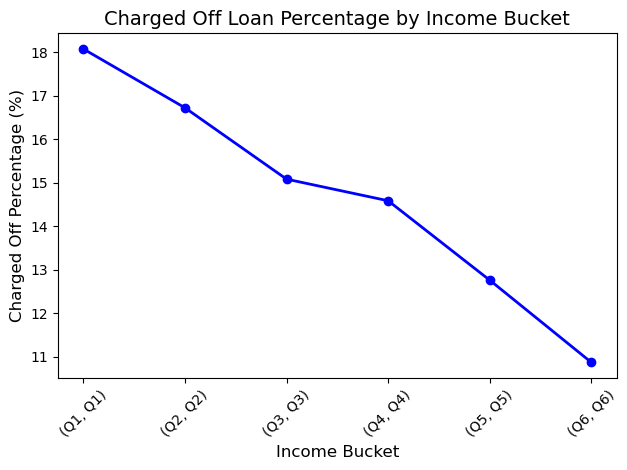


Bin Ranges:
Bucket 1: 4000.0 to 35000.0
Bucket 2: 35000.0 to 45000.0
Bucket 3: 45000.0 to 56000.0
Bucket 4: 56000.0 to 70000.0
Bucket 5: 70000.0 to 90000.0
Bucket 6: 90000.0 to 145000.0


In [306]:
temp = df2[['id', 'annual_inc', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

#sns.boxplot(temp['annual_inc'])

# Calculate the IQR (Interquartile Range)
Q1 = temp['annual_inc'].quantile(0.25)  # 25th percentile
Q3 = temp['annual_inc'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['annual_inc'] >= lower_bound) & (temp['annual_inc'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['annual_inc'].describe())

sns.boxplot(temp['annual_inc'])

# Create 4 buckets based on quartiles (percentile-based)
temp['income_bucket'], bin_intervals = pd.qcut(temp['annual_inc'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)

# visual
plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='income_bucket', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Boxplot of annual income by loan status
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='annual_inc', data=temp)

# Set labels and title
plt.xlabel('Loan Status (Nominal)', fontsize=12)
plt.ylabel('Annual Income (Continuous)', fontsize=12)
plt.title('Boxplot of Annual Income by Loan Status', fontsize=14)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['income_bucket','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('income_bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'income_bucket' values
plt.xlabel('Income Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by Income Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

##### Annual Income - Default Rate on Loan Amount

id             0
annual_inc     0
loan_status    0
loan_amnt      0
dtype: int64

Variable Statistics

count     36815.000000
mean      61218.193490
std       28224.583784
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145000.000000
Name: annual_inc, dtype: float64


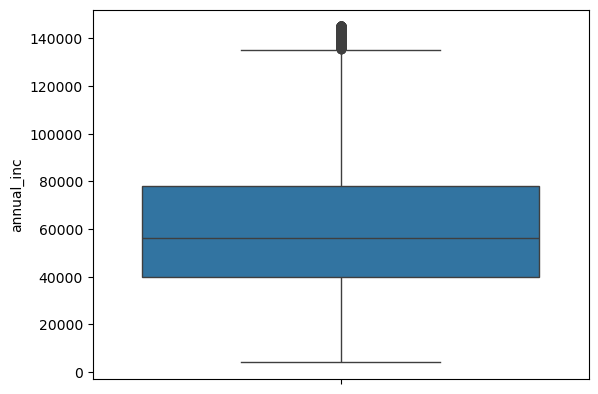

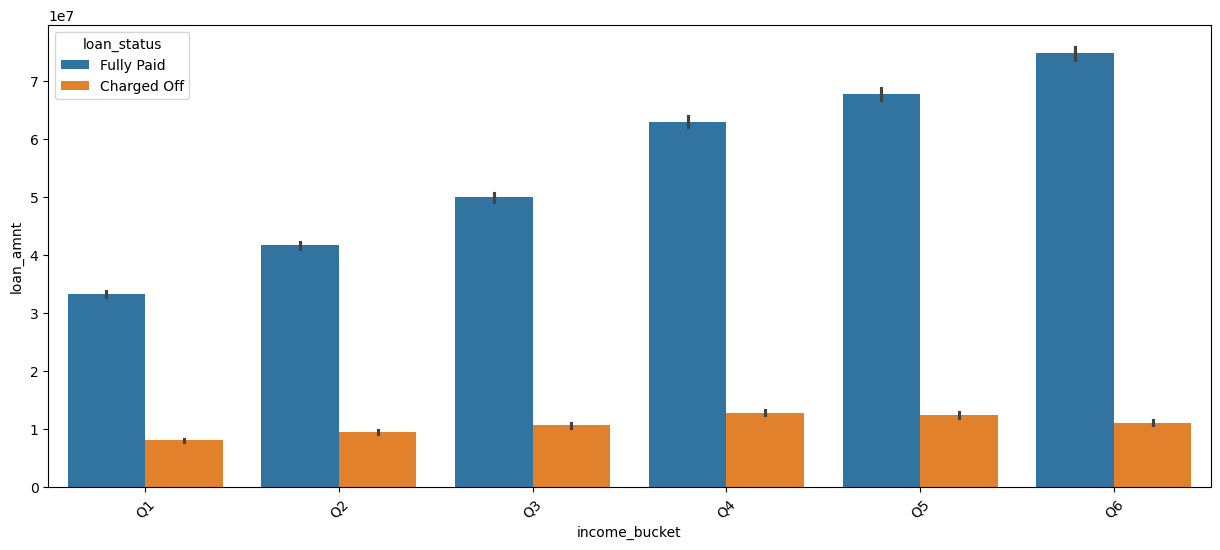


Loan Status by Loan Amount

income_bucket  loan_status
Q1             Charged Off     807426118
               Fully Paid     3530197507
Q2             Charged Off     688843447
               Fully Paid     3249026032
Q3             Charged Off     643066051
               Fully Paid     3425783456
Q4             Charged Off     680716592
               Fully Paid     3839457869
Q5             Charged Off     547134199
               Fully Paid     3590386699
Q6             Charged Off     426675323
               Fully Paid     3461380481
Name: id, dtype: int64

Default Rate (in percentage)

income_bucket  income_bucket
Q1             Q1               18.614481
Q2             Q2               17.492795
Q3             Q3               15.804616
Q4             Q4               15.059520
Q5             Q5               13.223720
Q6             Q6               10.974002
Name: id, dtype: float64


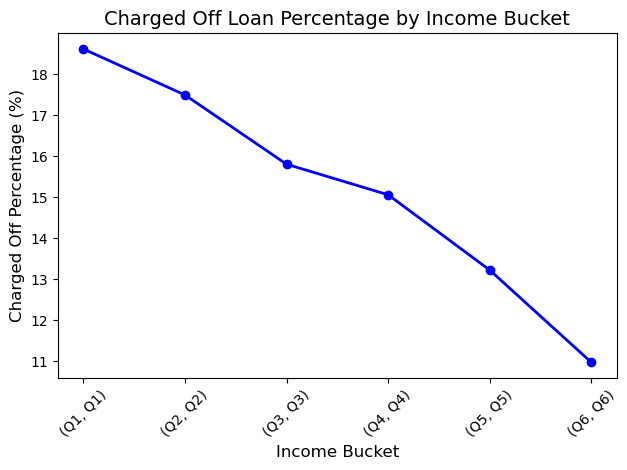


Bin Ranges:
Bucket 1: 4000.0 to 35000.0
Bucket 2: 35000.0 to 45000.0
Bucket 3: 45000.0 to 56000.0
Bucket 4: 56000.0 to 70000.0
Bucket 5: 70000.0 to 90000.0
Bucket 6: 90000.0 to 145000.0


In [308]:
temp = df2[['id', 'annual_inc', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

#sns.boxplot(temp['annual_inc'])

# Calculate the IQR (Interquartile Range)
Q1 = temp['annual_inc'].quantile(0.25)  # 25th percentile
Q3 = temp['annual_inc'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['annual_inc'] >= lower_bound) & (temp['annual_inc'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['annual_inc'].describe())
sns.boxplot(temp['annual_inc'])

# Create 4 buckets based on quartiles (percentile-based)
temp['income_bucket'], bin_intervals = pd.qcut(temp['annual_inc'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)



plt.figure(figsize=(15,6))
sns.barplot(data=temp, x='income_bucket', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['income_bucket','loan_status'])['id'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('income_bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'income_bucket' values
plt.xlabel('Income Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by Income Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

## Conclusion on Annual Income

##### It can be safely concluded that borrowers with higher income tend to make lower defaults

## Default Rate by Debt to Income ratio (dti)

##### Debt to Income ratio (dti) - Defualt Rate on Loan Count

id             0
dti            0
loan_status    0
loan_amnt      0
dtype: int64

Variable Statistics

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64


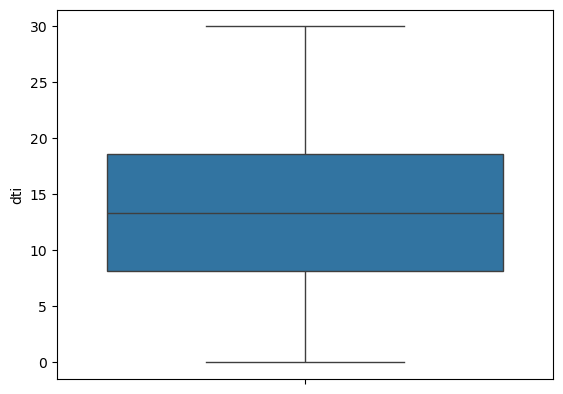

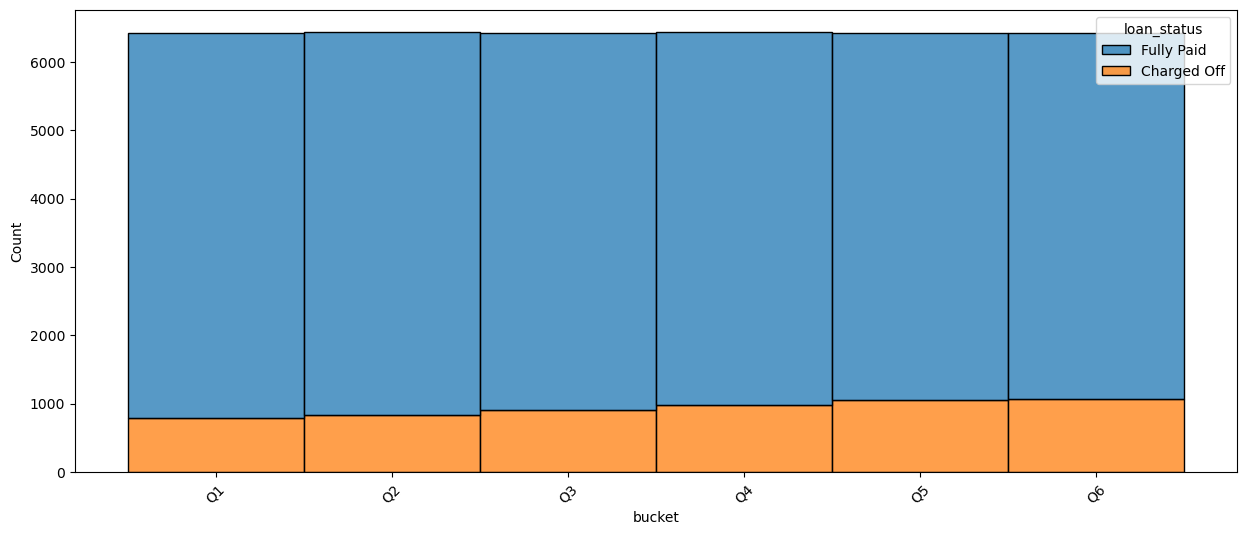

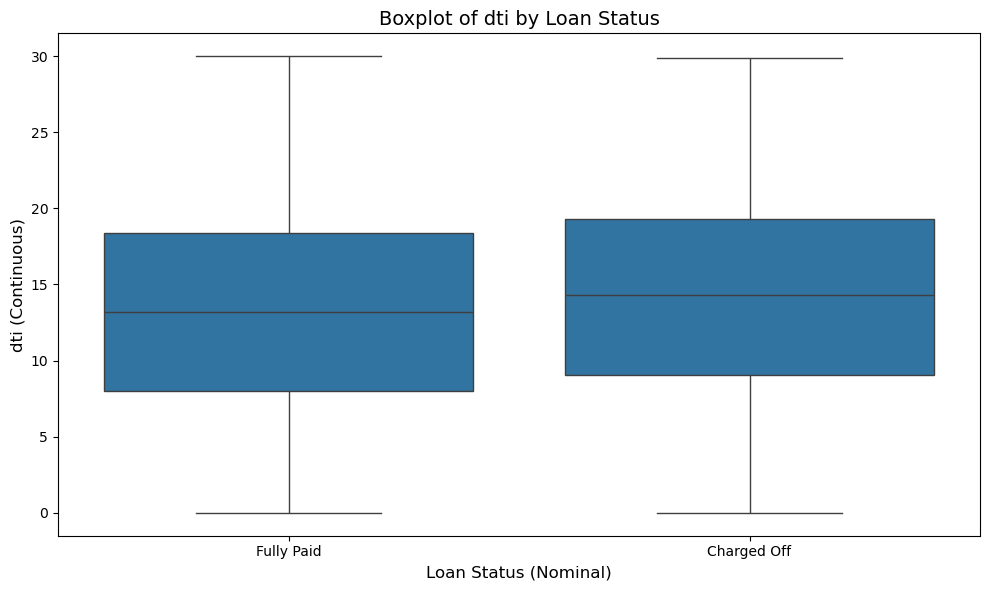


Loan Status by Loan Count

bucket  loan_status
Q1      Charged Off     783
        Fully Paid     5647
Q2      Charged Off     839
        Fully Paid     5601
Q3      Charged Off     904
        Fully Paid     5526
Q4      Charged Off     984
        Fully Paid     5448
Q5      Charged Off    1045
        Fully Paid     5379
Q6      Charged Off    1072
        Fully Paid     5349
Name: id, dtype: int64

Default Rate (in percentage)

bucket  bucket
Q1      Q1        12.177294
Q2      Q2        13.027950
Q3      Q3        14.059098
Q4      Q4        15.298507
Q5      Q5        16.267123
Q6      Q6        16.695219
Name: id, dtype: float64


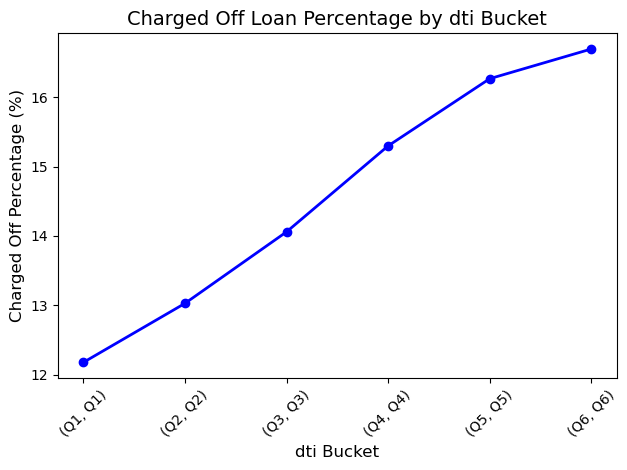


Bin Ranges:
Bucket 1: 0.0 to 6.023333333333321
Bucket 2: 6.023333333333321 to 9.96
Bucket 3: 9.96 to 13.37
Bucket 4: 13.37 to 16.71
Bucket 5: 16.71 to 20.5
Bucket 6: 20.5 to 29.99


In [312]:
temp = df2[['id', 'dti', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

#sns.boxplot(temp['annual_inc'])

# Calculate the IQR (Interquartile Range)
Q1 = temp['dti'].quantile(0.25)  # 25th percentile
Q3 = temp['dti'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['dti'] >= lower_bound) & (temp['dti'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['dti'].describe())

sns.boxplot(temp['dti'])

# Create 4 buckets based on quartiles (percentile-based)
temp['bucket'], bin_intervals = pd.qcut(temp['dti'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)

# visualisation
plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='bucket', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Boxplot of annual income by loan status
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='dti', data=temp)

# Set labels and title
plt.xlabel('Loan Status (Nominal)', fontsize=12)
plt.ylabel('dti (Continuous)', fontsize=12)
plt.title('Boxplot of dti by Loan Status', fontsize=14)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['bucket','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'income_bucket' values
plt.xlabel('dti Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by dti Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

##### Debt to Income - Default Rate on Loan Amount

id             0
dti            0
loan_status    0
loan_amnt      0
dtype: int64

Variable Statistics

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64


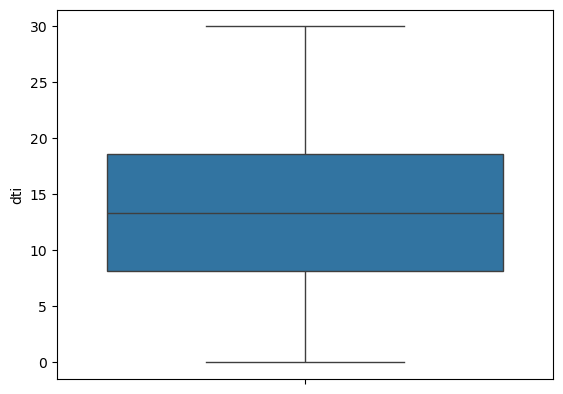

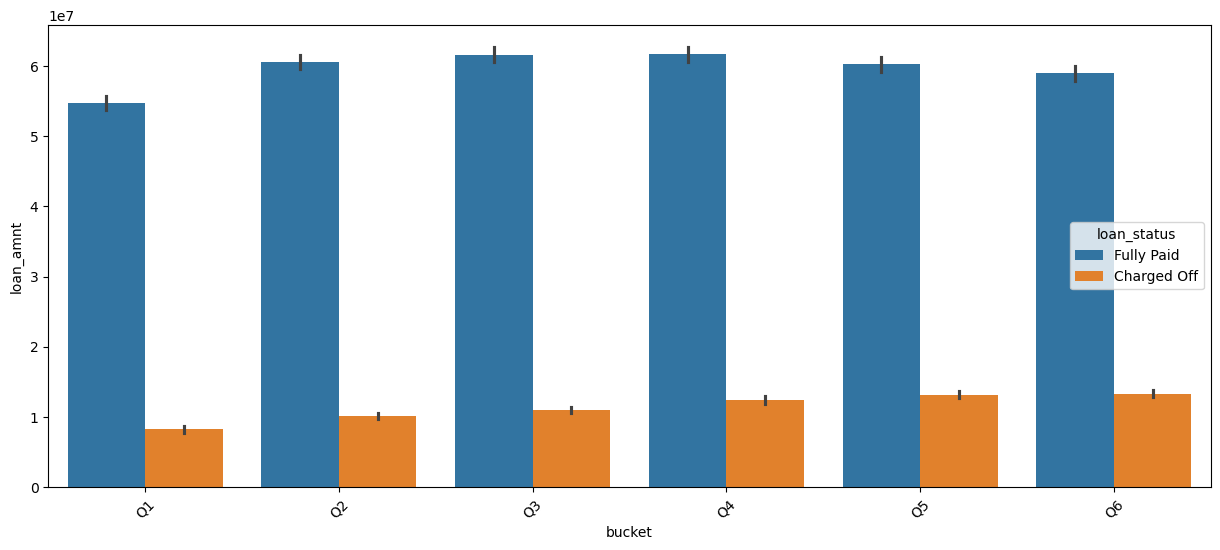


Loan Status by Loan Amount

bucket  loan_status
Q1      Charged Off     507133448
        Fully Paid     3637706887
Q2      Charged Off     578822705
        Fully Paid     3734058316
Q3      Charged Off     634482450
        Fully Paid     3718392328
Q4      Charged Off     685944154
        Fully Paid     3676360771
Q5      Charged Off     737932208
        Fully Paid     3670053850
Q6      Charged Off     782453303
        Fully Paid     3729320943
Name: id, dtype: int64

Default Rate (in percentage)

bucket  bucket
Q1      Q1        12.235295
Q2      Q2        13.420790
Q3      Q3        14.576171
Q4      Q4        15.724351
Q5      Q5        16.740802
Q6      Q6        17.342475
Name: id, dtype: float64


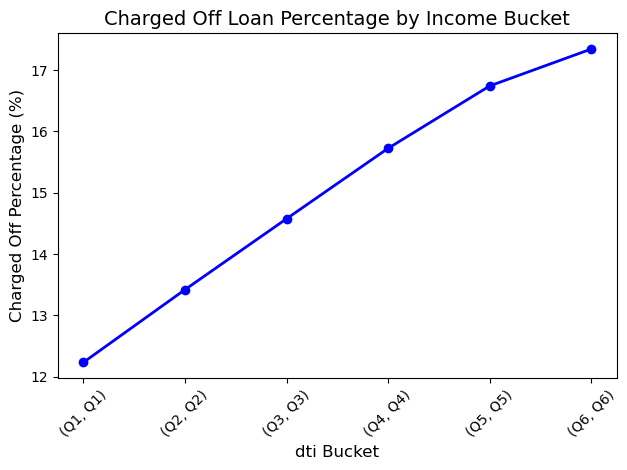


Bin Ranges:
Bucket 1: 0.0 to 6.023333333333321
Bucket 2: 6.023333333333321 to 9.96
Bucket 3: 9.96 to 13.37
Bucket 4: 13.37 to 16.71
Bucket 5: 16.71 to 20.5
Bucket 6: 20.5 to 29.99


In [314]:
temp = df2[['id', 'dti', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

#sns.boxplot(temp['annual_inc'])

# Calculate the IQR (Interquartile Range)
Q1 = temp['dti'].quantile(0.25)  # 25th percentile
Q3 = temp['dti'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['dti'] >= lower_bound) & (temp['dti'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['dti'].describe())

sns.boxplot(temp['dti'])

# Create 4 buckets based on quartiles (percentile-based)
temp['bucket'], bin_intervals = pd.qcut(temp['dti'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)


# visualisation
plt.figure(figsize=(15,6))
sns.barplot(data=temp, x='bucket', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['bucket','loan_status'])['id'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'income_bucket' values
plt.xlabel('dti Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by Income Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

## Conclusion on Debt to Income ratio (DTI)

##### It can be safely concluded that borrowers with higher Debt to Income ratio tend to make higher defaults

##### DTI is a leading indicator of default that represents the ability of borrower to repay the loan installments

## Relationship between Annual Income and DTI

##### Annual income - dti Relation by Loan Count

id             0
annual_inc     0
dti            0
loan_status    0
loan_amnt      0
dtype: int64

dti Statistics

count    38577.000000
mean        13.272727
std          6.673044
min          0.000000
25%          8.130000
50%         13.370000
75%         18.560000
max         29.990000
Name: dti, dtype: float64


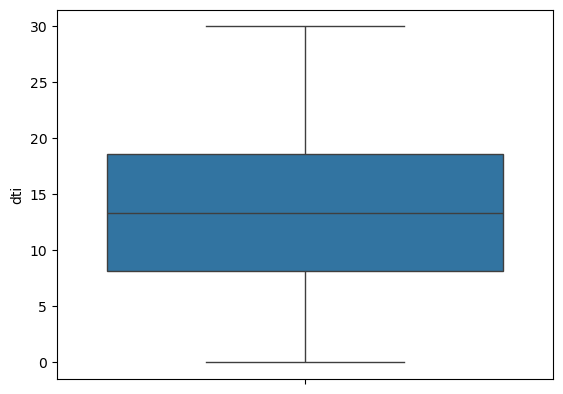


annual_inc Statistics

count     36815.000000
mean      61218.193490
std       28224.583784
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       78000.000000
max      145000.000000
Name: annual_inc, dtype: float64


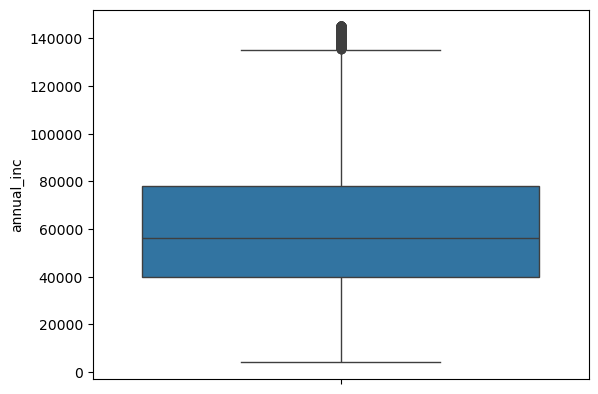

Correlation between annual_inc and dti: -7.5 %



In [318]:
temp = df2[['id', 'annual_inc', 'dti', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

# Remove the outliers from dti

# Calculate the IQR (Interquartile Range)
Q1 = temp['dti'].quantile(0.25)  # 25th percentile
Q3 = temp['dti'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['dti'] >= lower_bound) & (temp['dti'] <= upper_bound)]
print('\033[1;4m' + '\ndti Statistics\n' + '\033[0m')
print(temp['dti'].describe())

sns.boxplot(temp['dti'])
plt.show()


# Remove the outliers from annual_inc

# Calculate the IQR (Interquartile Range)
Q1 = temp['annual_inc'].quantile(0.25)  # 25th percentile
Q3 = temp['annual_inc'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['annual_inc'] >= lower_bound) & (temp['annual_inc'] <= upper_bound)]
print('\033[1;4m' + '\nannual_inc Statistics\n' + '\033[0m')
print(temp['annual_inc'].describe())

sns.boxplot(temp['annual_inc'])
plt.show()


# Calculate the correlation between 'annual_inc' and 'dti'
correlation = temp['annual_inc'].corr(temp['dti'])

print('\033[1;4m' + "Correlation between annual_inc and dti:", round(correlation*100,1), '%\n' + '\033[0m')

## Conclusion on relationship between Annual Income Debt to Income (DTI)

##### There is no strong correlation between Annual income and DTI

## Default Rate by Revolving line utilization rate

##### Revolving line utilization rate - Defualt Rate on Loan Count

id              0
revol_util     50
loan_status     0
loan_amnt       0
dtype: int64

Variable Statistics

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64


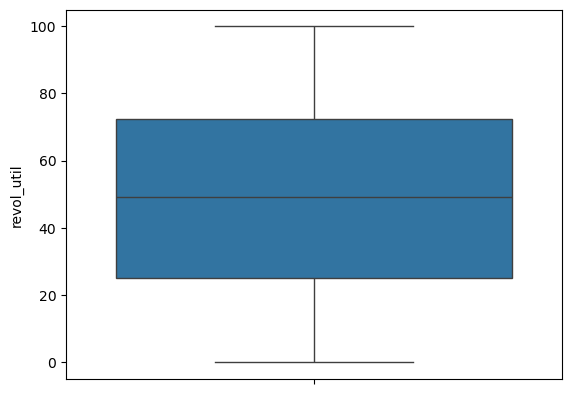

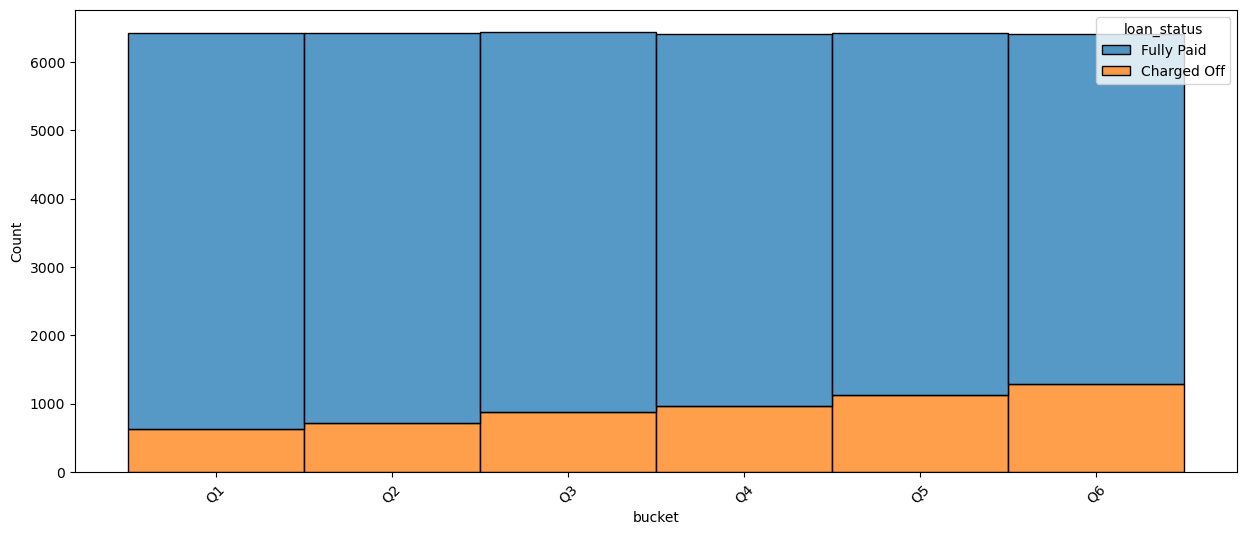

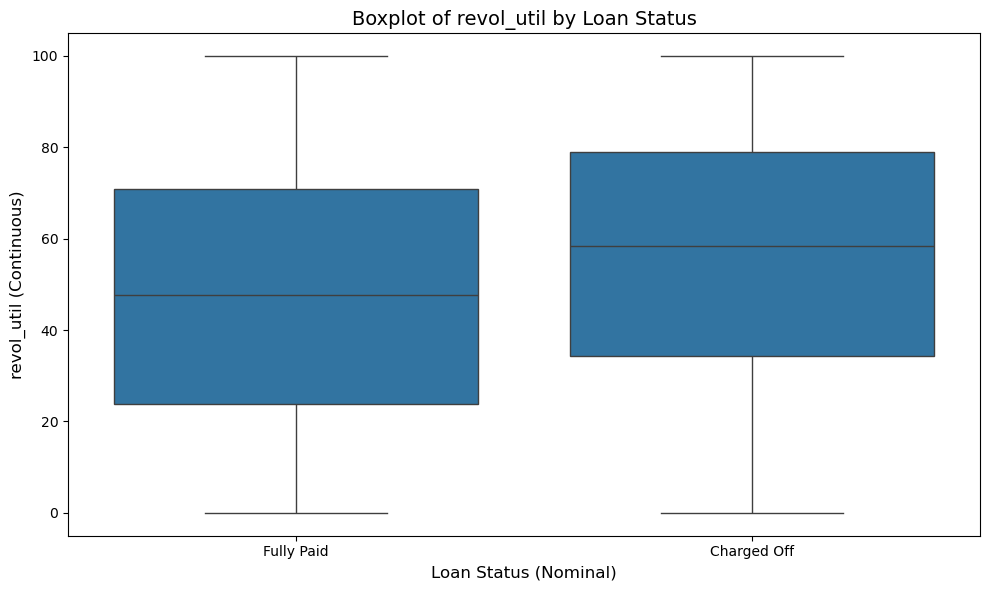


Loan Status by Loan Count

bucket  loan_status
Q1      Charged Off     634
        Fully Paid     5790
Q2      Charged Off     720
        Fully Paid     5707
Q3      Charged Off     875
        Fully Paid     5566
Q4      Charged Off     970
        Fully Paid     5441
Q5      Charged Off    1126
        Fully Paid     5294
Q6      Charged Off    1286
        Fully Paid     5118
Name: id, dtype: int64

Default Rate (in percentage)

bucket  bucket
Q1      Q1         9.869240
Q2      Q2        11.202738
Q3      Q3        13.584847
Q4      Q4        15.130245
Q5      Q5        17.538941
Q6      Q6        20.081199
Name: id, dtype: float64


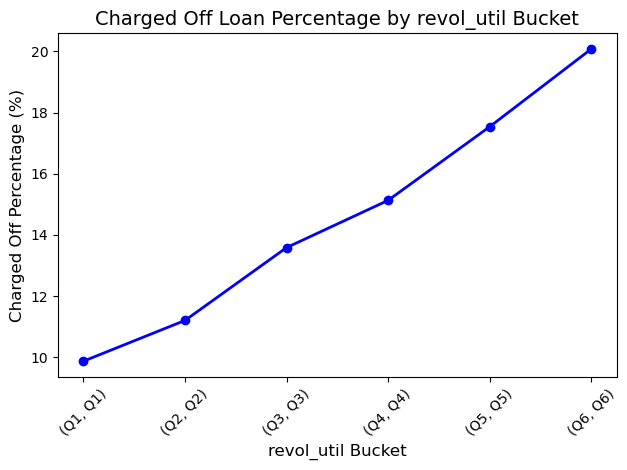


Bin Ranges:
Bucket 1: 0.0 to 16.1
Bucket 2: 16.1 to 33.5
Bucket 3: 33.5 to 49.1
Bucket 4: 49.1 to 64.5
Bucket 5: 64.5 to 80.6
Bucket 6: 80.6 to 99.9


In [322]:
temp = df2[['id', 'revol_util', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())
temp['revol_util'] = temp['revol_util'].str.replace("%","").astype(float)

# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['revol_util'].quantile(0.25)  # 25th percentile
Q3 = temp['revol_util'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['revol_util'] >= lower_bound) & (temp['revol_util'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['revol_util'].describe())

sns.boxplot(temp['revol_util'])

# Create 4 buckets based on quartiles (percentile-based)
temp['bucket'], bin_intervals = pd.qcut(temp['revol_util'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)


# visualisation
plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='bucket', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Boxplot of by loan status
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='revol_util', data=temp)

# Set labels and title
plt.xlabel('Loan Status (Nominal)', fontsize=12)
plt.ylabel('revol_util (Continuous)', fontsize=12)
plt.title('Boxplot of revol_util by Loan Status', fontsize=14)

# Show the plot
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['bucket','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'bucket' values
plt.xlabel('revol_util Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by revol_util Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

##### Revolving line utilization rate - Default Rate on Loan Amount

id              0
revol_util     50
loan_status     0
loan_amnt       0
dtype: int64

Variable Statistics

count    38527.000000
mean        48.702777
std         28.364741
min          0.000000
25%         25.200000
50%         49.100000
75%         72.300000
max         99.900000
Name: revol_util, dtype: float64


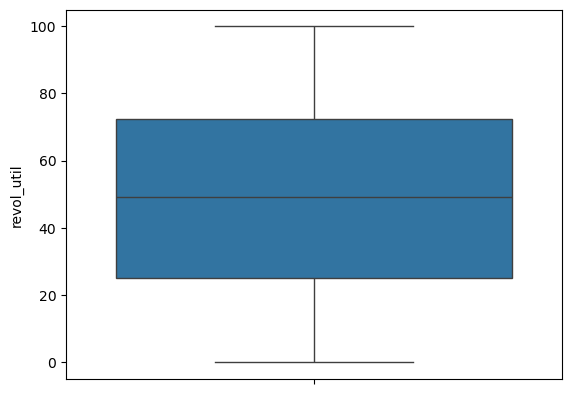

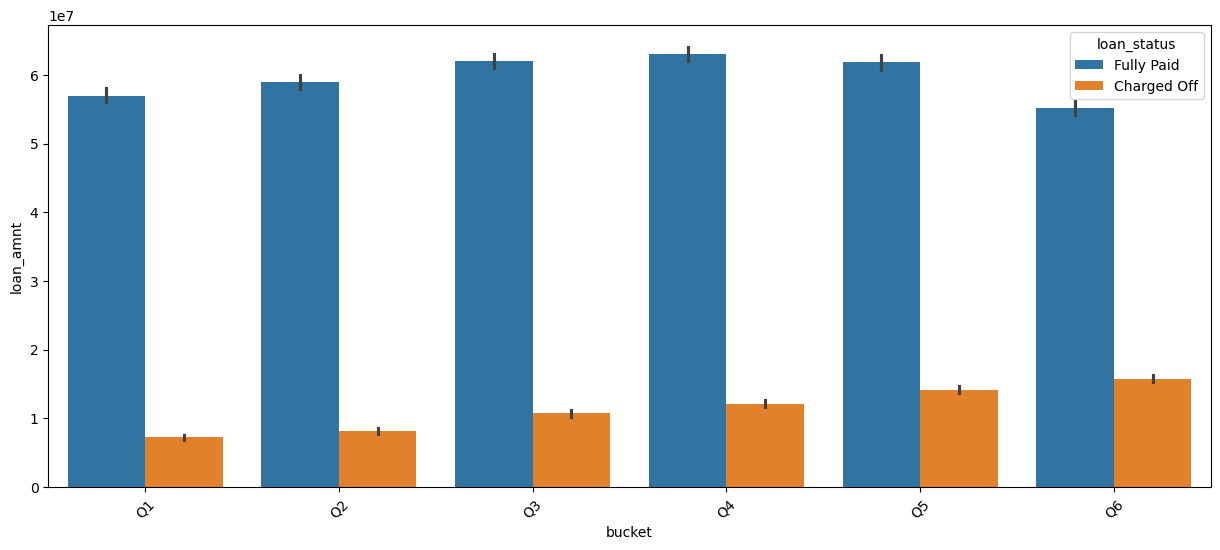


Loan Status by Loan Amount

bucket  loan_status
Q1      Charged Off     412878448
        Fully Paid     3721884445
Q2      Charged Off     491842276
        Fully Paid     3768182535
Q3      Charged Off     592753986
        Fully Paid     3720587294
Q4      Charged Off     679772327
        Fully Paid     3729561375
Q5      Charged Off     814169397
        Fully Paid     3683884489
Q6      Charged Off     926712298
        Fully Paid     3524255927
Name: id, dtype: int64

Default Rate (in percentage)

bucket  bucket
Q1      Q1         9.985541
Q2      Q2        11.545526
Q3      Q3        13.742339
Q4      Q4        15.416668
Q5      Q5        18.100481
Q6      Q6        20.820465
Name: id, dtype: float64


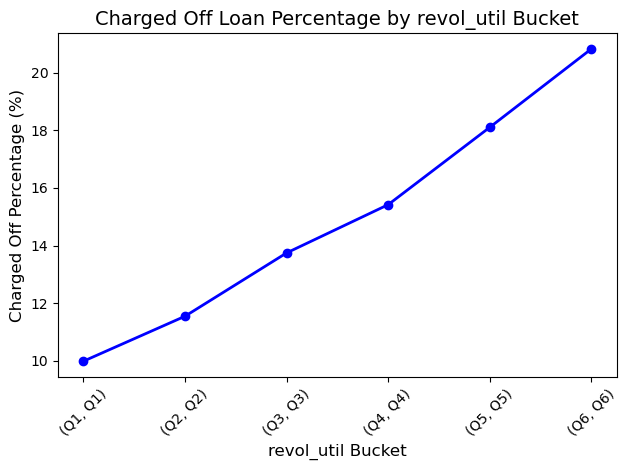


Bin Ranges:
Bucket 1: 0.0 to 16.1
Bucket 2: 16.1 to 33.5
Bucket 3: 33.5 to 49.1
Bucket 4: 49.1 to 64.5
Bucket 5: 64.5 to 80.6
Bucket 6: 80.6 to 99.9


In [324]:
temp = df2[['id', 'revol_util', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())
temp['revol_util'] = temp['revol_util'].str.replace("%","").astype(float)

# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['revol_util'].quantile(0.25)  # 25th percentile
Q3 = temp['revol_util'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['revol_util'] >= lower_bound) & (temp['revol_util'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['revol_util'].describe())

sns.boxplot(temp['revol_util'])

# Create 4 buckets based on quartiles (percentile-based)
temp['bucket'], bin_intervals = pd.qcut(temp['revol_util'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)


# visualisation
plt.figure(figsize=(15,6))
sns.barplot(data=temp, x='bucket', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['bucket','loan_status'])['id'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'bucket' values
plt.xlabel('revol_util Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by revol_util Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

## Conclusion on Revolving line utilization rate

##### Borrowers with higher Revolving line utilization rate tend to make higher defaults

##### Borrowers may have revolving lines available for their disposal, and they tend to utilize these lines to pay off their debts in times of crisis or before making any default

##### High utilization rate is a leading indicator of likelihood of default

## Default Rate by inq_last_6mths

##### inq_last_6mths - Defualt Rate on Loan Count

id                0
inq_last_6mths    0
loan_status       0
loan_amnt         0
dtype: int64


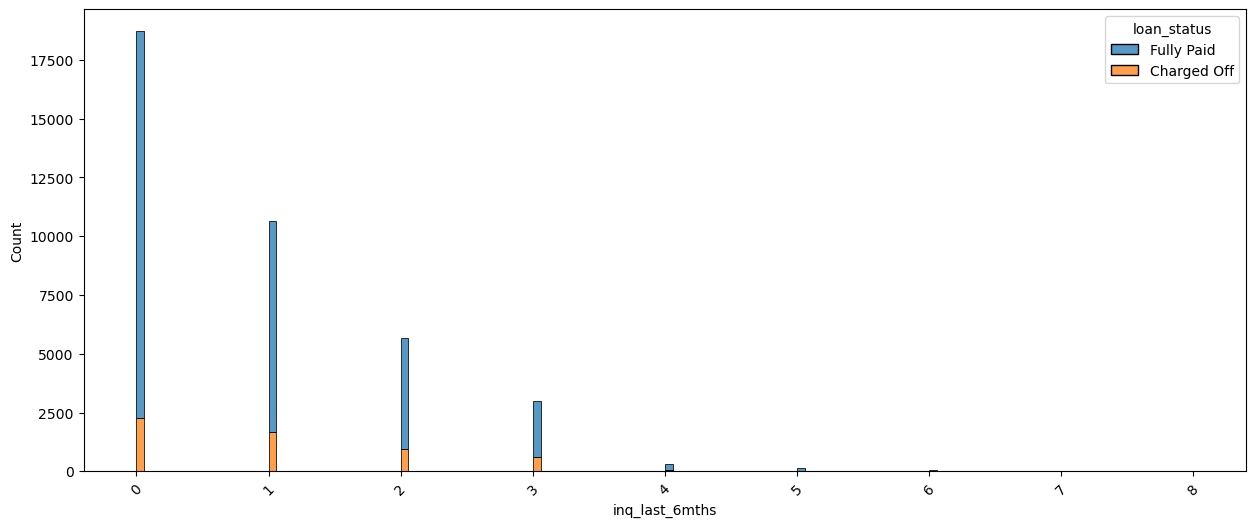


Loan Status by Loan Count

inq_last_6mths  loan_status
0               Charged Off     2280
                Fully Paid     16429
1               Charged Off     1677
                Fully Paid      8983
2               Charged Off      943
                Fully Paid      4711
3               Charged Off      619
                Fully Paid      2364
4               Charged Off       51
                Fully Paid       265
5               Charged Off       28
                Fully Paid       116
6               Charged Off       16
                Fully Paid        47
7               Charged Off       10
                Fully Paid        24
8               Charged Off        3
                Fully Paid        11
Name: id, dtype: int64

Default Rate (in percentage)

inq_last_6mths  inq_last_6mths
0               0                 12.186648
1               1                 15.731707
2               2                 16.678458
3               3                 20.750922
4               4

<Axes: xlabel='inq_last_6mths,inq_last_6mths'>

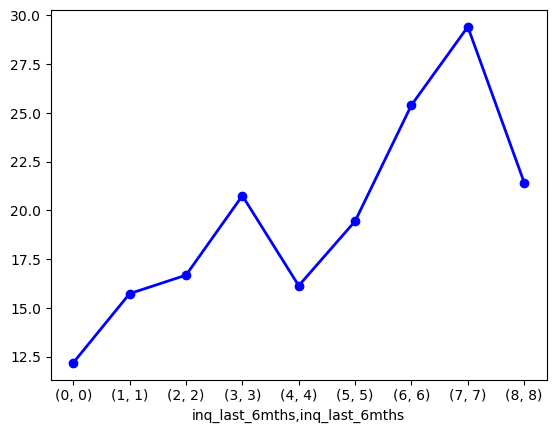

In [328]:
temp = df2[['id', 'inq_last_6mths', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='inq_last_6mths', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['inq_last_6mths','loan_status'])['id'].count()
loan_percentage = loan_count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

##### inq_last_6mths - Default Rate on Loan Amount

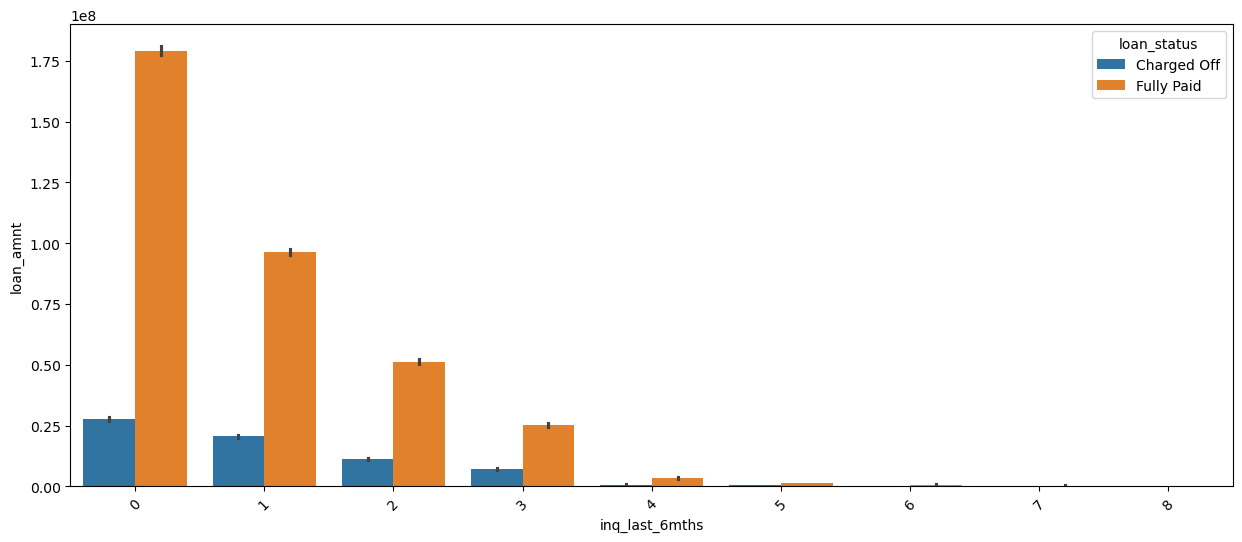


Loan Status by Loan Amount

inq_last_6mths  loan_status
0               Charged Off     27597325
                Fully Paid     179134575
1               Charged Off     20639475
                Fully Paid      96446925
2               Charged Off     11149575
                Fully Paid      51269950
3               Charged Off      7033575
                Fully Paid      25154750
4               Charged Off       743800
                Fully Paid       3496450
5               Charged Off       508875
                Fully Paid       1387950
6               Charged Off       226950
                Fully Paid        685725
7               Charged Off       152800
                Fully Paid        309400
8               Charged Off        59000
                Fully Paid        164000
Name: loan_amnt, dtype: int64

Default Rate (in percentage)

inq_last_6mths  inq_last_6mths
0               0                 13.349331
1               1                 17.627560
2               2        

<Axes: xlabel='inq_last_6mths,inq_last_6mths'>

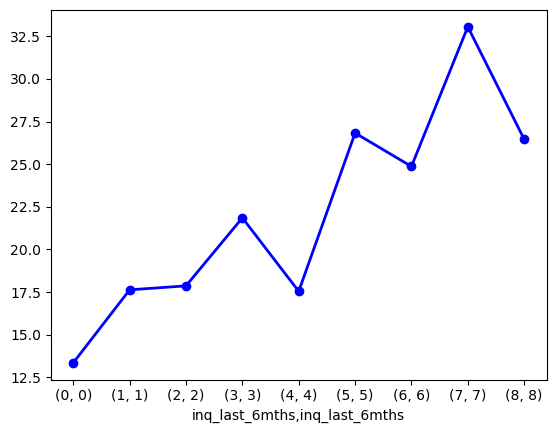

In [330]:
temp = df2[['id', 'inq_last_6mths', 'loan_status', 'loan_amnt']]

plt.figure(figsize=(15,6))
sns.barplot(data=temp, x='inq_last_6mths', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['inq_last_6mths','loan_status'])['loan_amnt'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('inq_last_6mths').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

## Conclusion on inq_last_6mths

##### As a general trend, inq_last_6mths seems to be an indicator of higher default rate. This indicates that for low quality loans, borrower must have attempted for loan through multiple sources

##### Multiple inquiries also suggest that loans for such borrowers must have been rejected due to some defect by multiple lenders, which also indicate higher chances of default

## Default Rate by Purpose of loan

##### purpose - Defualt Rate on Loan Count

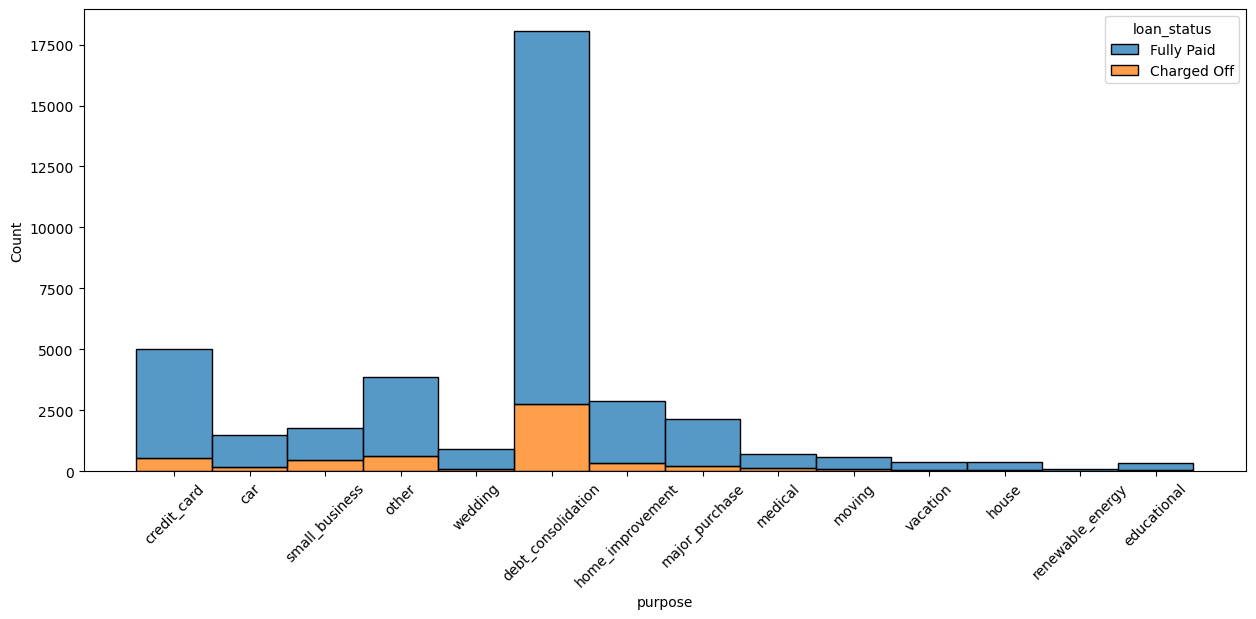


Loan Status by Loan Count

purpose             loan_status
car                 Charged Off      160
                    Fully Paid      1339
credit_card         Charged Off      542
                    Fully Paid      4485
debt_consolidation  Charged Off     2767
                    Fully Paid     15288
educational         Charged Off       56
                    Fully Paid       269
home_improvement    Charged Off      347
                    Fully Paid      2528
house               Charged Off       59
                    Fully Paid       308
major_purchase      Charged Off      222
                    Fully Paid      1928
medical             Charged Off      106
                    Fully Paid       575
moving              Charged Off       92
                    Fully Paid       484
other               Charged Off      633
                    Fully Paid      3232
renewable_energy    Charged Off       19
                    Fully Paid        83
small_business      Charged Off      4

In [334]:
temp = df2[['id', 'purpose', 'loan_status', 'loan_amnt']]

plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='purpose', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_count = temp.groupby(['purpose','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('purpose').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

##### purpose - Default Rate on Loan Amount

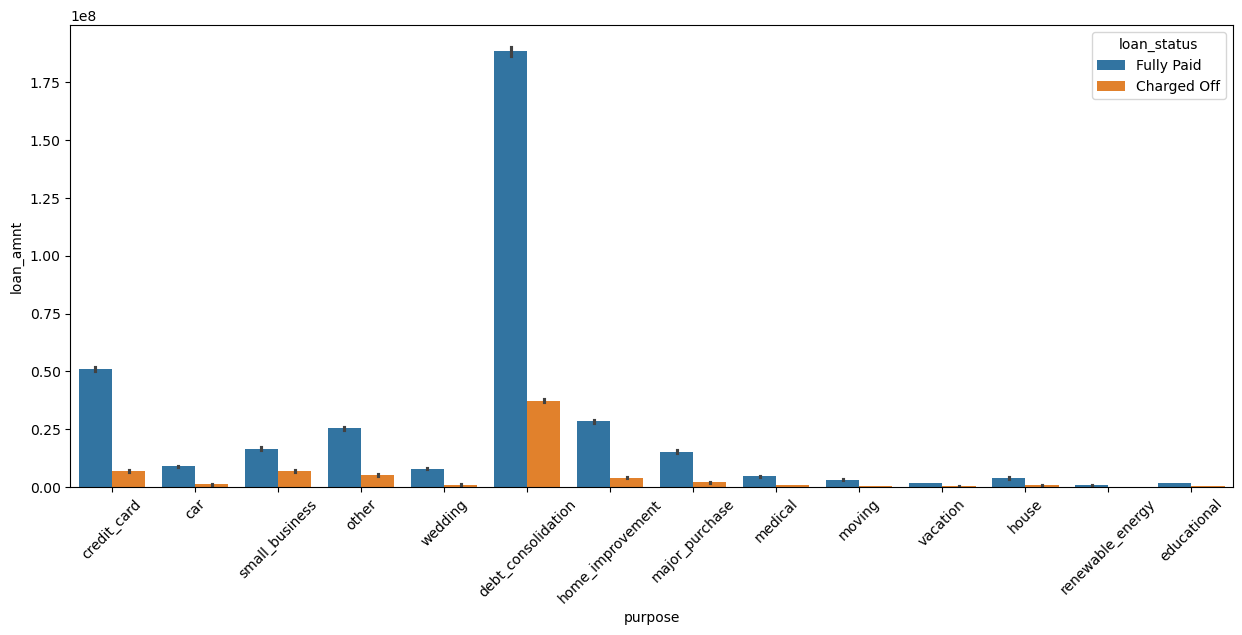


Loan Status by Loan Amount

purpose             loan_status
car                 Charged Off      1162275
                    Fully Paid       8951075
credit_card         Charged Off      7054100
                    Fully Paid      51115400
debt_consolidation  Charged Off     37404100
                    Fully Paid     188345825
educational         Charged Off       440100
                    Fully Paid       1773300
home_improvement    Charged Off      4134050
                    Fully Paid      28376450
house               Charged Off       745775
                    Fully Paid       3934725
major_purchase      Charged Off      2027975
                    Fully Paid      15328125
medical             Charged Off       908250
                    Fully Paid       4623350
moving              Charged Off       546125
                    Fully Paid       3237050
other               Charged Off      5244325
                    Fully Paid      25429925
renewable_energy    Charged Off       1

In [336]:
temp = df2[['id', 'purpose', 'loan_status', 'loan_amnt']]

plt.figure(figsize=(15,6))
sns.barplot(data=temp, x='purpose', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['purpose','loan_status'])['loan_amnt'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('purpose').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

## Conclusion on purpose

##### Small business loans have significantly high default rates

##### Disproportionally large amount of loans are made for purpose of debt consolidation

##### Consumer loan such as purchases, car, credit card, wedding, etc have relatively lower default rates

##### Such loans are typically optional in nature and tend to be taken by borrowers with expected cashflows in future to repay the loanan

## Default Rate by Installment

##### Installment - Defualt Rate on Loan Count

id             0
installment    0
loan_status    0
loan_amnt      0
dtype: int64

Variable Statistics

count    37204.000000
mean       300.444607
std        176.196017
min         15.690000
25%        163.032500
50%        268.910000
75%        402.080000
max        815.250000
Name: installment, dtype: float64


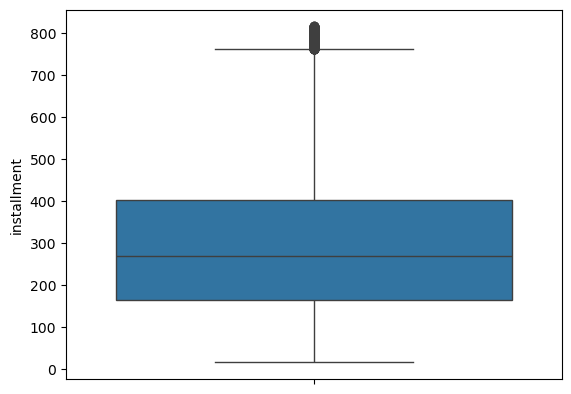

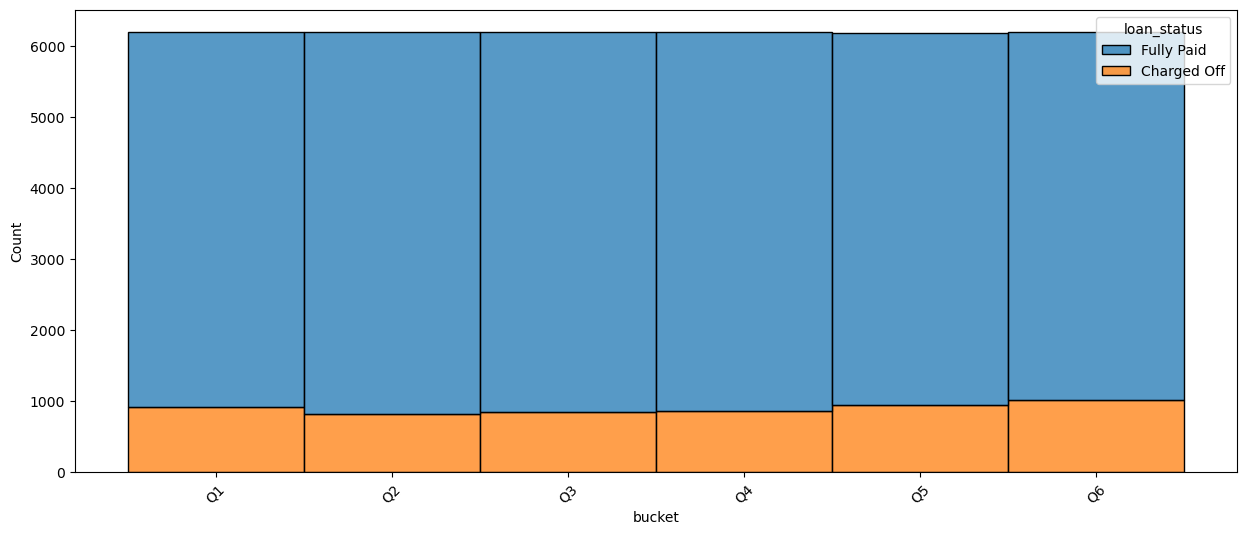

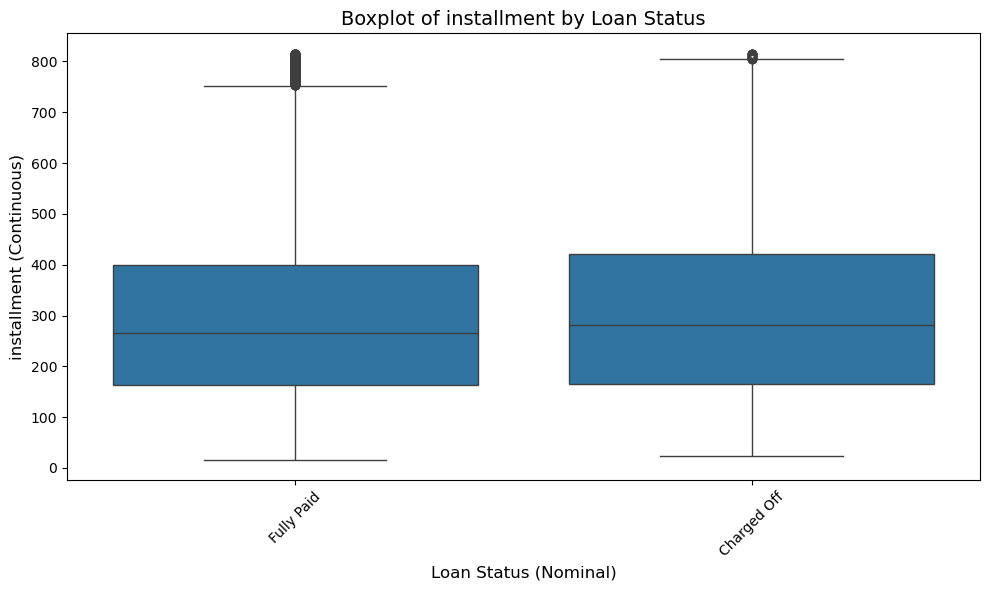


Loan Status by Loan Count

bucket  loan_status
Q1      Charged Off     909
        Fully Paid     5292
Q2      Charged Off     810
        Fully Paid     5390
Q3      Charged Off     839
        Fully Paid     5362
Q4      Charged Off     860
        Fully Paid     5346
Q5      Charged Off     945
        Fully Paid     5251
Q6      Charged Off    1012
        Fully Paid     5188
Name: id, dtype: int64

Default Rate (in percentage)

bucket  bucket
Q1      Q1        14.658926
Q2      Q2        13.064516
Q3      Q3        13.530076
Q4      Q4        13.857557
Q5      Q5        15.251775
Q6      Q6        16.322581
Name: id, dtype: float64


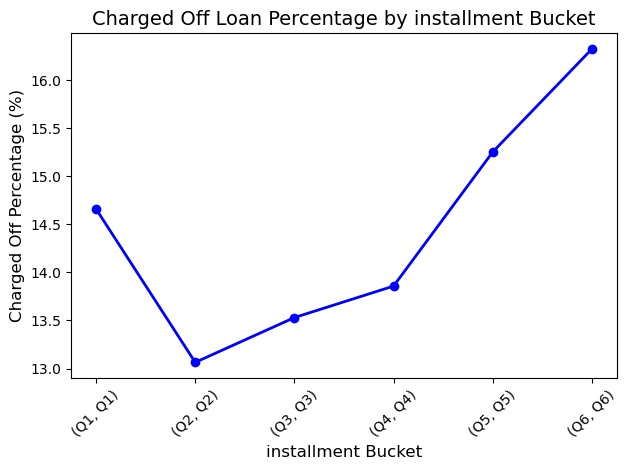


Bin Ranges:
Bucket 1: 15.69 to 129.57999999999984
Bucket 2: 129.57999999999984 to 193.88999999999996
Bucket 3: 193.88999999999996 to 268.90999999999997
Bucket 4: 268.90999999999997 to 349.49
Bucket 5: 349.49 to 483.38
Bucket 6: 483.38 to 815.25


In [340]:
temp = df2[['id', 'installment', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['installment'].quantile(0.25)  # 25th percentile
Q3 = temp['installment'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['installment'] >= lower_bound) & (temp['installment'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['installment'].describe())

sns.boxplot(temp['installment'])

# Create 4 buckets based on quartiles (percentile-based)
temp['bucket'], bin_intervals = pd.qcut(temp['installment'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)

# visualisation
plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='bucket', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Boxplot of by loan status
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='installment', data=temp)

# Set labels and title
plt.xlabel('Loan Status (Nominal)', fontsize=12)
plt.ylabel('installment (Continuous)', fontsize=12)
plt.title('Boxplot of installment by Loan Status', fontsize=14)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['bucket','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'bucket' values
plt.xlabel('installment Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by installment Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

##### Installment - Default Rate on Loan Amount

id             0
installment    0
loan_status    0
loan_amnt      0
dtype: int64

Variable Statistics

count    37204.000000
mean       300.444607
std        176.196017
min         15.690000
25%        163.032500
50%        268.910000
75%        402.080000
max        815.250000
Name: installment, dtype: float64
   installment bucket
0       162.87     Q2
1        59.83     Q1
2        84.33     Q1
3       339.31     Q4
5       156.46     Q2


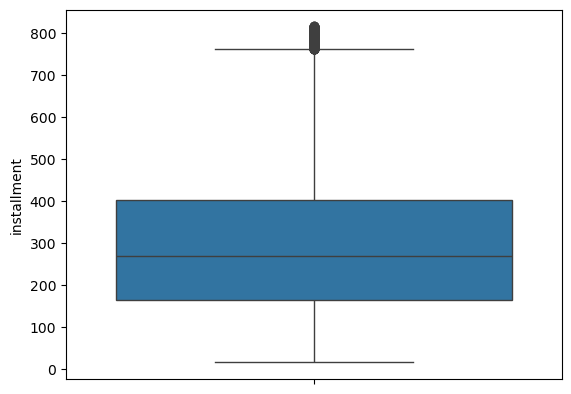

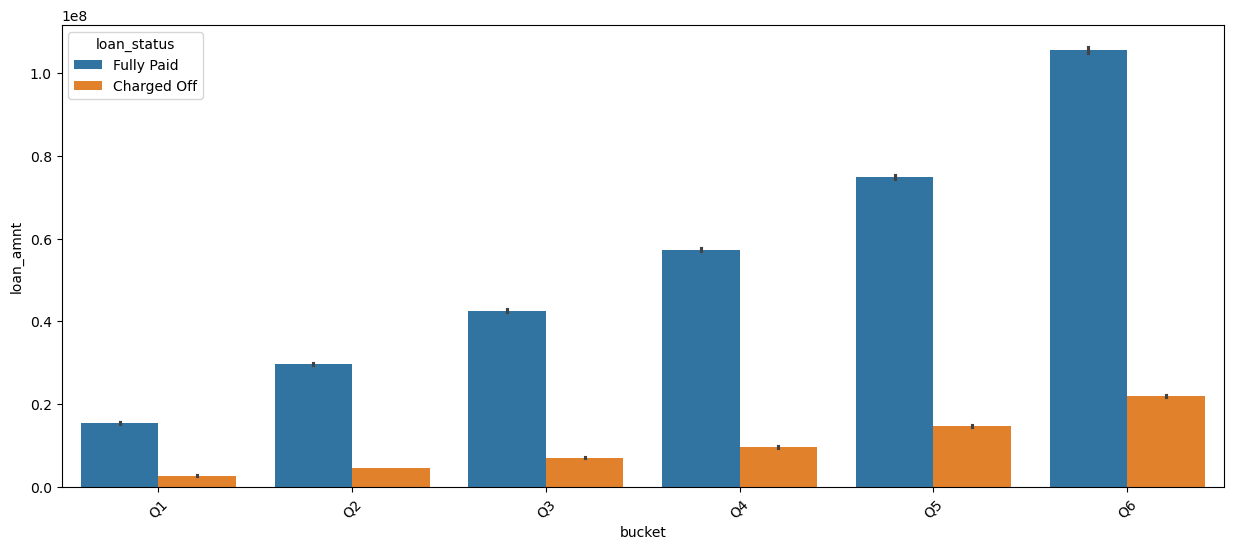


Loan Status by Loan Amount

bucket  loan_status
Q1      Charged Off     610692068
        Fully Paid     3472006856
Q2      Charged Off     546679006
        Fully Paid     3540205007
Q3      Charged Off     573814593
        Fully Paid     3561069988
Q4      Charged Off     596640458
        Fully Paid     3597720987
Q5      Charged Off     701882188
        Fully Paid     3672388904
Q6      Charged Off     715466875
        Fully Paid     3516213718
Name: id, dtype: int64

Default Rate (in percentage)

bucket  bucket
Q1      Q1        14.958048
Q2      Q2        13.376426
Q3      Q3        13.877403
Q4      Q4        14.224822
Q5      Q5        16.045695
Q6      Q6        16.907393
Name: id, dtype: float64


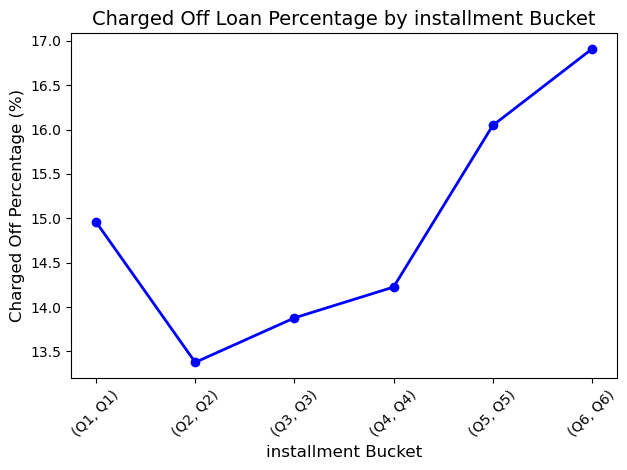


Bin Ranges:
Bucket 1: 15.69 to 129.57999999999984
Bucket 2: 129.57999999999984 to 193.88999999999996
Bucket 3: 193.88999999999996 to 268.90999999999997
Bucket 4: 268.90999999999997 to 349.49
Bucket 5: 349.49 to 483.38
Bucket 6: 483.38 to 815.25


In [342]:
temp = df2[['id', 'installment', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['installment'].quantile(0.25)  # 25th percentile
Q3 = temp['installment'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['installment'] >= lower_bound) & (temp['installment'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['installment'].describe())

sns.boxplot(temp['installment'])

# Create 4 buckets based on quartiles (percentile-based)
temp['bucket'], bin_intervals = pd.qcut(temp['installment'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)

# View the new column
print(temp[['installment', 'bucket']].head())


plt.figure(figsize=(15,6))
sns.barplot(data=temp, x='bucket', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['bucket','loan_status'])['id'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'bucket' values
plt.xlabel('installment Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by installment Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

## Conclusion on Installment

##### Beyond a certain threshold of \~200 USD, chances of default tend to increase with the installment size

##### Larger installments increases the burden on borrower, and may be subject to default in case of any adverse condition on borrower income

## Default Rate by Length of Employment

##### emp_length - Defualt Rate on Loan Count

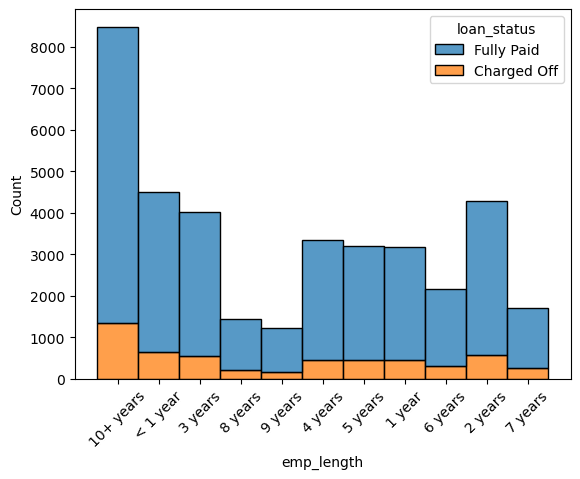


Loan Status by Loan Count

emp_length  loan_status
1 year      Charged Off     456
            Fully Paid     2713
10+ years   Charged Off    1331
            Fully Paid     7157
2 years     Charged Off     567
            Fully Paid     3724
3 years     Charged Off     555
            Fully Paid     3457
4 years     Charged Off     462
            Fully Paid     2880
5 years     Charged Off     458
            Fully Paid     2736
6 years     Charged Off     307
            Fully Paid     1861
7 years     Charged Off     263
            Fully Paid     1448
8 years     Charged Off     203
            Fully Paid     1232
9 years     Charged Off     158
            Fully Paid     1068
< 1 year    Charged Off     639
            Fully Paid     3869
Name: id, dtype: int64

Default Rate (in percentage)

emp_length  emp_length
1 year      1 year        14.389397
10+ years   10+ years     15.680961
2 years     2 years       13.213703
3 years     3 years       13.833500
4 years     4 years    

In [346]:
temp = df2[['id', 'emp_length', 'loan_status', 'loan_amnt']]
sns.histplot(data=temp, x='emp_length', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['emp_length','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('emp_length').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

##### emp_length - Default Rate on Loan Amount

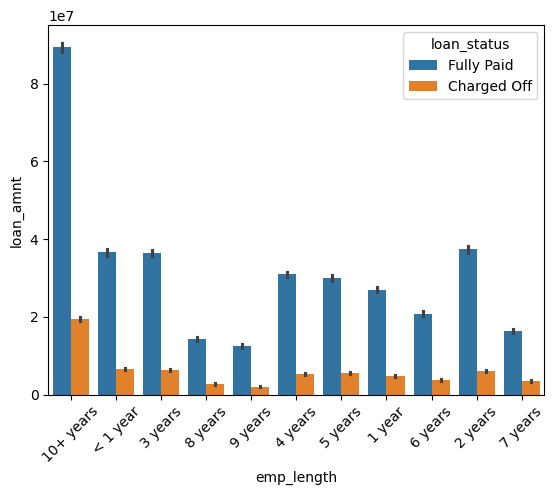


Loan Status by Loan Amount

emp_length  loan_status
1 year      Charged Off     4862475
            Fully Paid     27007600
10+ years   Charged Off    19425225
            Fully Paid     89289925
2 years     Charged Off     6088500
            Fully Paid     37355975
3 years     Charged Off     6330050
            Fully Paid     36344575
4 years     Charged Off     5323350
            Fully Paid     30901700
5 years     Charged Off     5516350
            Fully Paid     29982025
6 years     Charged Off     3857025
            Fully Paid     20798550
7 years     Charged Off     3391375
            Fully Paid     16396525
8 years     Charged Off     2649325
            Fully Paid     14199800
9 years     Charged Off     2075500
            Fully Paid     12517950
< 1 year    Charged Off     6586600
            Fully Paid     36563725
Name: loan_amnt, dtype: int64

Default Rate (in percentage)

emp_length  emp_length
1 year      1 year        15.257181
10+ years   10+ years     17.868002

In [348]:
temp = df2[['id', 'emp_length', 'loan_status', 'loan_amnt']]
sns.barplot(data=temp, x='emp_length', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['emp_length','loan_status'])['loan_amnt'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('emp_length').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

## Conclusion on emp_length

##### Length of employment does not seem to have any correlation with tendency to default

## Default Rate by verification_status

##### verification_status - Defualt Rate on Loan Count

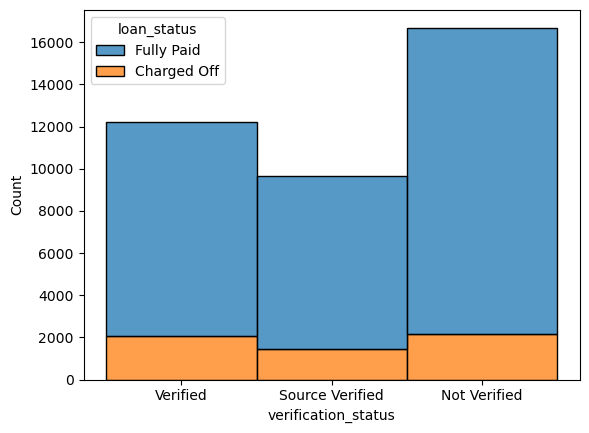


Loan Status by Loan Count

verification_status  loan_status
Not Verified         Charged Off     2142
                     Fully Paid     14552
Source Verified      Charged Off     1434
                     Fully Paid      8243
Verified             Charged Off     2051
                     Fully Paid     10155
Name: id, dtype: int64

Default Rate (in percentage)

verification_status  verification_status
Not Verified         Not Verified           12.830957
Source Verified      Source Verified        14.818642
Verified             Verified               16.803212
Name: id, dtype: float64


In [352]:
temp = df2[['id', 'verification_status', 'loan_status', 'loan_amnt']]
sns.histplot(data=temp, x='verification_status', hue='loan_status', multiple='stack', stat='count')
plt.show()

# Default rate by Loan Amount
loan_count = temp.groupby(['verification_status','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('verification_status').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

##### verification_status - Default Rate on Loan Amount

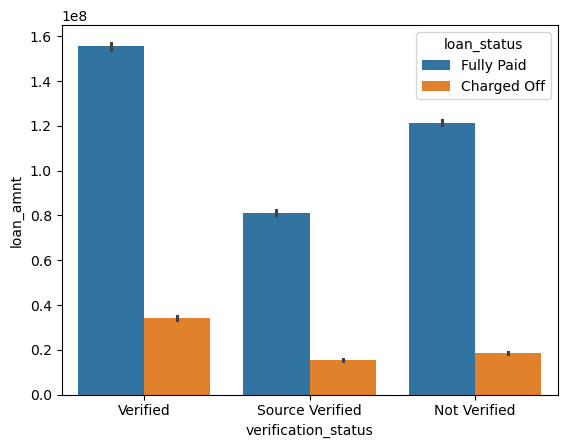


Loan Status by Loan Amount

verification_status  loan_status
Not Verified         Charged Off     18565225
                     Fully Paid     121446600
Source Verified      Charged Off     15324450
                     Fully Paid      81161475
Verified             Charged Off     34221700
                     Fully Paid     155441650
Name: loan_amnt, dtype: int64

Default Rate (in percentage)

verification_status  verification_status
Not Verified         Not Verified           13.259755
Source Verified      Source Verified        15.882576
Verified             Verified               18.043391
Name: loan_amnt, dtype: float64


In [354]:
temp = df2[['id', 'verification_status', 'loan_status', 'loan_amnt']]
sns.barplot(data=temp, x='verification_status', hue='loan_status', y='loan_amnt', estimator='sum')
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['verification_status','loan_status'])['loan_amnt'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('verification_status').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

## Conclusion on verification_status
##### Verification status does not seem to have any correlation with tendency to default

## Default Rate by home_ownership

##### home_ownership - Defualt Rate on Loan Count

id                0
home_ownership    0
loan_status       0
loan_amnt         0
dtype: int64


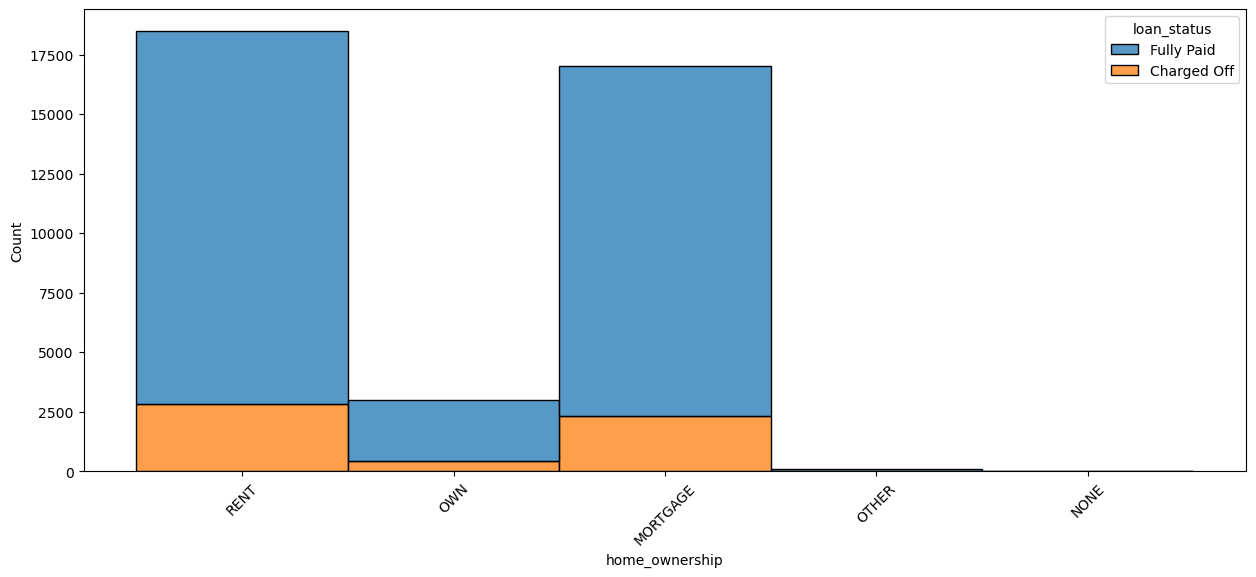


Loan Status by Loan Count

home_ownership  loan_status
MORTGAGE        Charged Off     2327
                Fully Paid     14694
NONE            Fully Paid         3
OTHER           Charged Off       18
                Fully Paid        80
OWN             Charged Off      443
                Fully Paid      2532
RENT            Charged Off     2839
                Fully Paid     15641
Name: id, dtype: int64

Default Rate (in percentage)

home_ownership  home_ownership
MORTGAGE        MORTGAGE          13.671347
OTHER           OTHER             18.367347
OWN             OWN               14.890756
RENT            RENT              15.362554
Name: id, dtype: float64


In [358]:
temp = df2[['id', 'home_ownership', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='home_ownership', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['home_ownership','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('home_ownership').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

##### home_ownership - Default Rate on Loan Amount

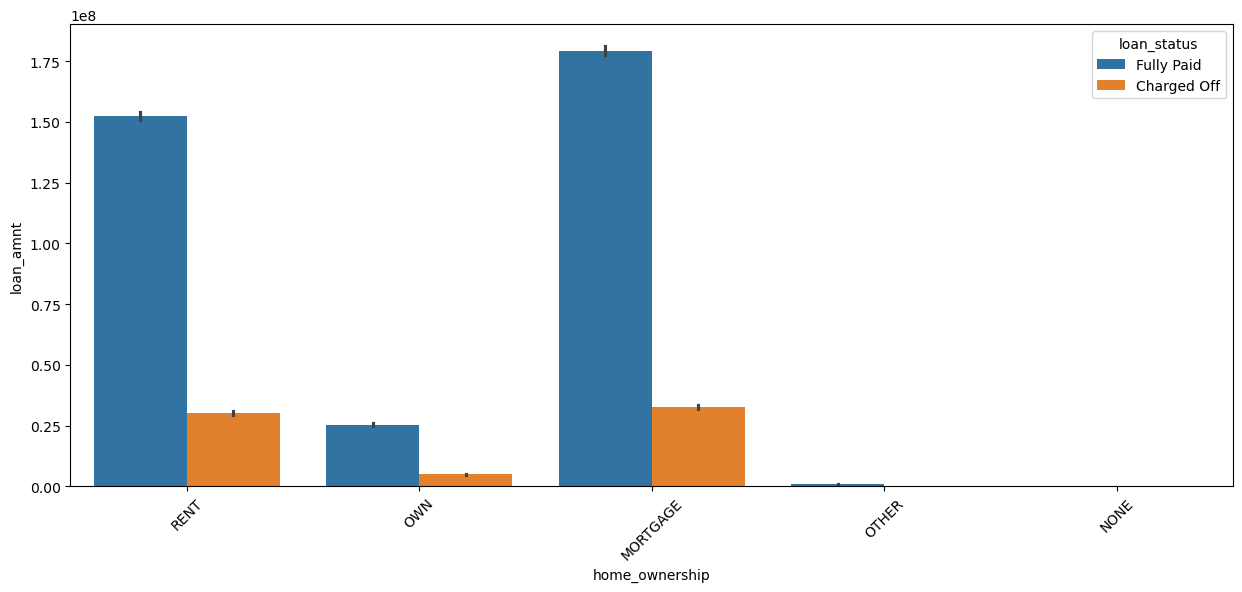


Loan Status by Loan Amount

home_ownership  loan_status
MORTGAGE        Charged Off     32799500
                Fully Paid     179434900
NONE            Fully Paid         16800
OTHER           Charged Off       247450
                Fully Paid        797525
OWN             Charged Off      4879775
                Fully Paid      25281075
RENT            Charged Off     30184650
                Fully Paid     152519425
Name: loan_amnt, dtype: int64

Default Rate (in percentage)

home_ownership  home_ownership
MORTGAGE        MORTGAGE          15.454375
OTHER           OTHER             23.679992
OWN             OWN               16.179169
RENT            RENT              16.521060
Name: loan_amnt, dtype: float64


In [360]:
temp = df2[['id', 'home_ownership', 'loan_status', 'loan_amnt']]

plt.figure(figsize=(15,6))
sns.barplot(data=temp, x='home_ownership', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['home_ownership','loan_status'])['loan_amnt'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('home_ownership').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

## Conclusion on home_ownership

##### home_ownership status does not seem to have any correlation with tendency to default

## Default Rate by addr_state

##### addr_state - Defualt Rate on Loan Count

id             0
addr_state     0
loan_status    0
loan_amnt      0
dtype: int64


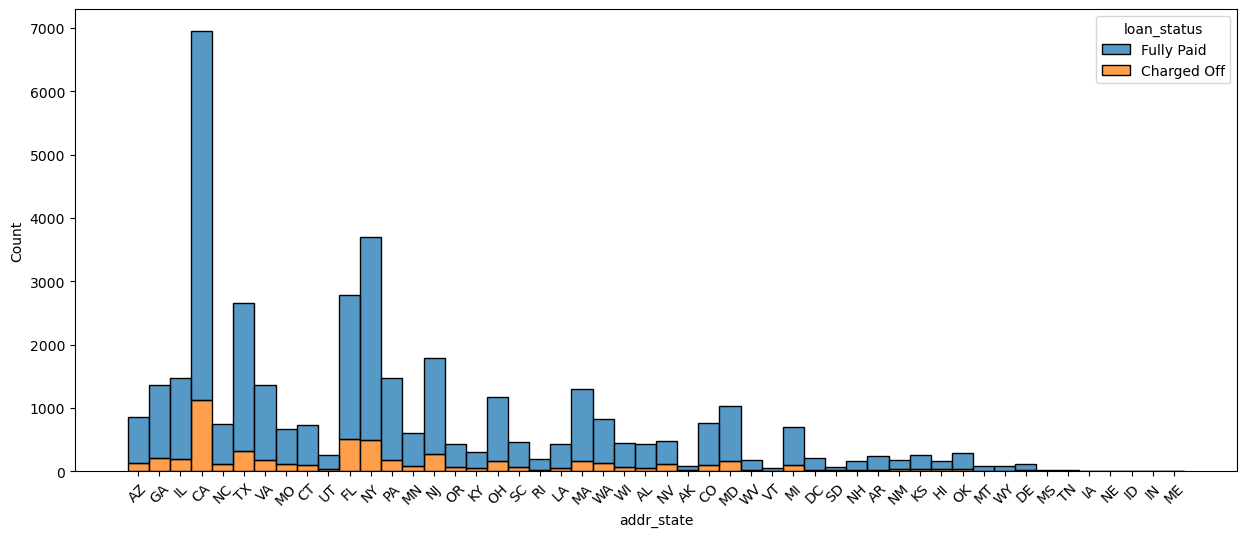


Loan Status by Loan Count

addr_state  loan_status
AK          Charged Off      15
            Fully Paid       63
AL          Charged Off      54
            Fully Paid      381
AR          Charged Off      27
            Fully Paid      208
AZ          Charged Off     123
            Fully Paid      726
CA          Charged Off    1125
            Fully Paid     5824
CO          Charged Off      98
            Fully Paid      668
CT          Charged Off      94
            Fully Paid      632
DC          Charged Off      15
            Fully Paid      196
DE          Charged Off      12
            Fully Paid      101
FL          Charged Off     504
            Fully Paid     2277
GA          Charged Off     215
            Fully Paid     1144
HI          Charged Off      28
            Fully Paid      138
IA          Fully Paid        5
ID          Charged Off       1
            Fully Paid        5
IL          Charged Off     197
            Fully Paid     1281
IN          Fully Pa

In [364]:
temp = df2[['id', 'addr_state', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='addr_state', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['addr_state','loan_status'])['id'].count()
loan_percentage = loan_count.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

##### addr_state - Default Rate on Loan Amount

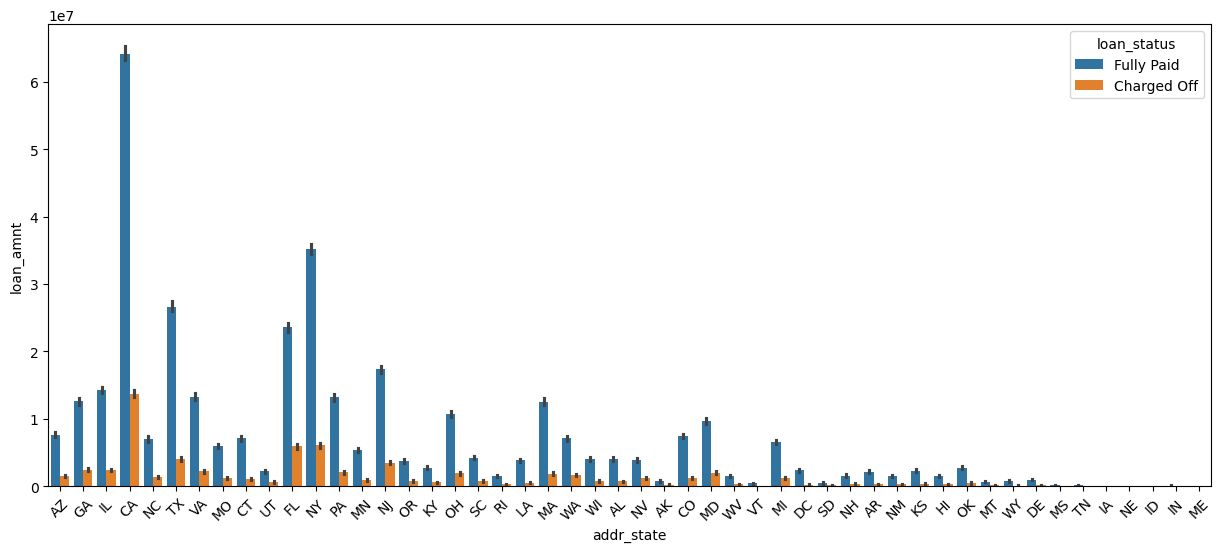


Loan Status by Loan Amount

addr_state  loan_status
AK          Charged Off      210875
            Fully Paid       770425
AL          Charged Off      709025
            Fully Paid      4061625
AR          Charged Off      274350
            Fully Paid      2157700
AZ          Charged Off     1475700
            Fully Paid      7624625
CA          Charged Off    13739475
            Fully Paid     64187625
CO          Charged Off     1240125
            Fully Paid      7431250
CT          Charged Off     1078250
            Fully Paid      7104475
DC          Charged Off      204500
            Fully Paid      2385850
DE          Charged Off      134750
            Fully Paid       992350
FL          Charged Off     5902025
            Fully Paid     23552000
GA          Charged Off     2453800
            Fully Paid     12588450
HI          Charged Off      259900
            Fully Paid      1545425
IA          Fully Paid        56450
ID          Charged Off        3000
           

In [366]:
temp = df2[['id', 'addr_state', 'loan_status', 'loan_amnt']]

plt.figure(figsize=(15,6))
sns.barplot(data=temp, x='addr_state', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['addr_state','loan_status'])['loan_amnt'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('addr_state').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)

## Conclusion on addr_state

##### addr_state status does not seem to have any correlation with tendency to default

## Default Rate by delinq_2yrs

##### delinq_2yrs - Defualt Rate on Loan Count

id             0
delinq_2yrs    0
loan_status    0
loan_amnt      0
dtype: int64


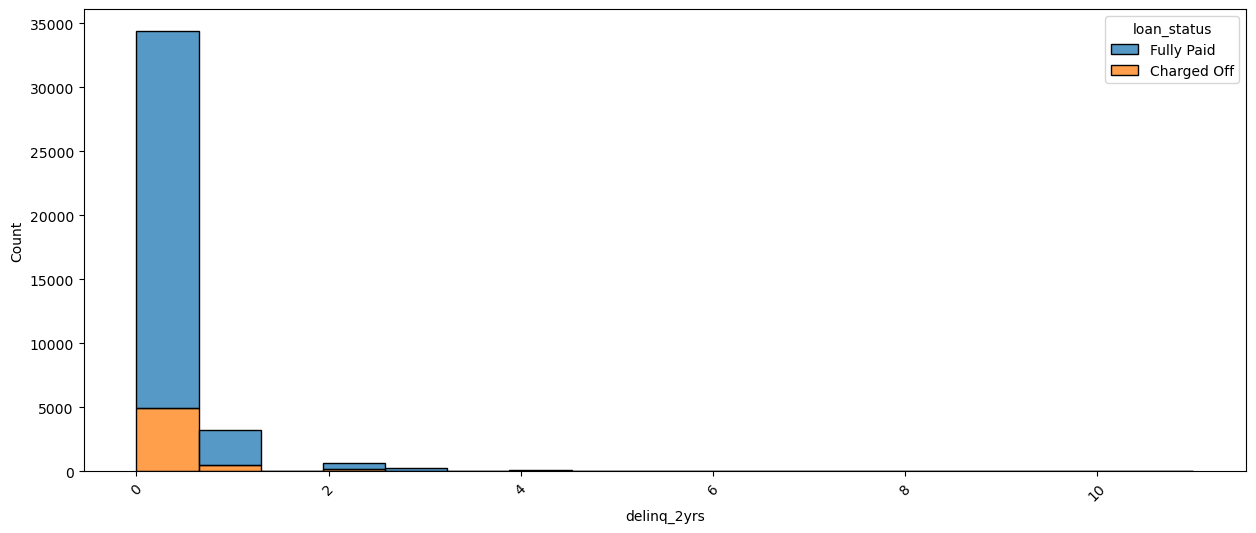


Loan Status by Loan Count

delinq_2yrs  loan_status
0            Charged Off     4936
             Fully Paid     29450
1            Charged Off      507
             Fully Paid      2700
2            Charged Off      130
             Fully Paid       543
3            Charged Off       35
             Fully Paid       177
4            Charged Off       13
             Fully Paid        47
5            Charged Off        3
             Fully Paid        18
6            Charged Off        1
             Fully Paid         9
7            Charged Off        1
             Fully Paid         3
8            Charged Off        1
             Fully Paid         1
9            Fully Paid         1
11           Fully Paid         1
Name: id, dtype: int64

Default Rate (in percentage)

delinq_2yrs  delinq_2yrs
0            0              14.354679
1            1              15.809167
2            2              19.316493
3            3              16.509434
4            4              21.66666

<Axes: xlabel='delinq_2yrs,delinq_2yrs'>

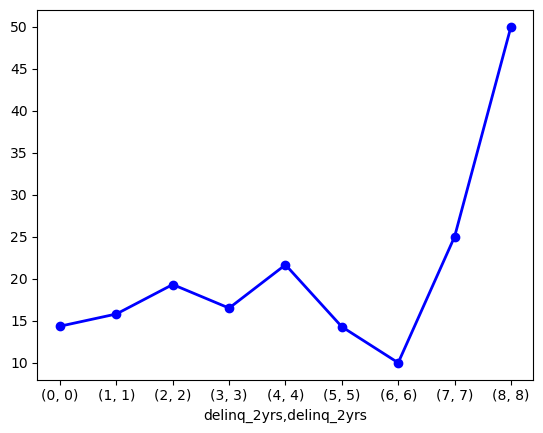

In [370]:
temp = df2[['id', 'delinq_2yrs', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='delinq_2yrs', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['delinq_2yrs','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('delinq_2yrs').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

##### delinq_2yrs - Default Rate on Loan Amount

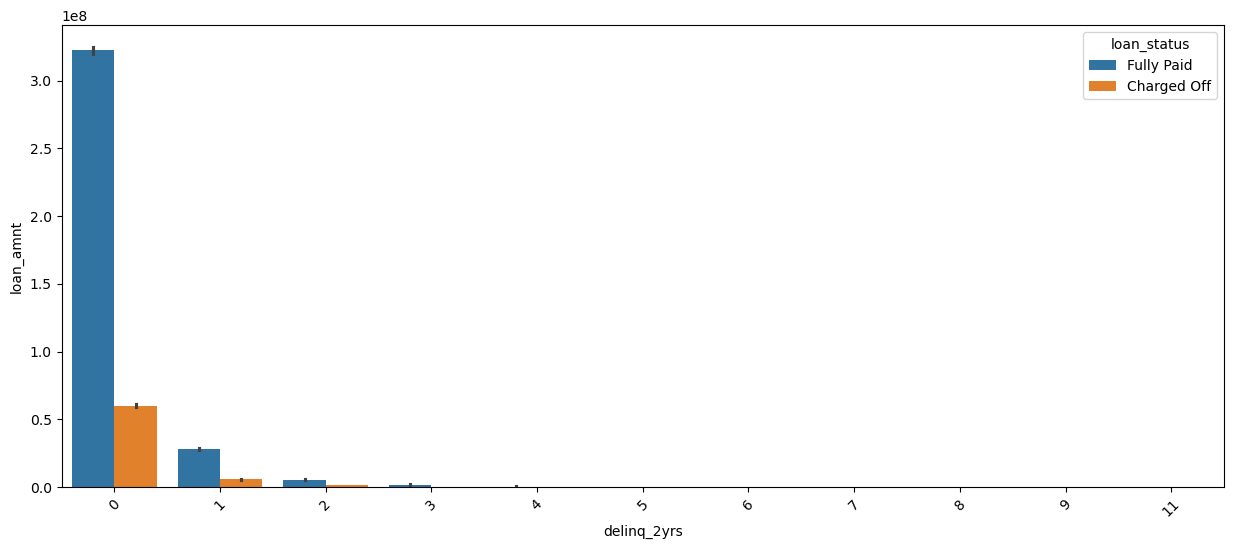


Loan Status by Loan Amount

delinq_2yrs  loan_status
0            Charged Off     60105450
             Fully Paid     322329750
1            Charged Off      5922825
             Fully Paid      27854300
2            Charged Off      1566900
             Fully Paid       5377875
3            Charged Off       349700
             Fully Paid       1804100
4            Charged Off       111500
             Fully Paid        444050
5            Charged Off        17400
             Fully Paid        157275
6            Charged Off        20000
             Fully Paid         44300
7            Charged Off         5600
             Fully Paid         23875
8            Charged Off        12000
             Fully Paid          4200
9            Fully Paid          5000
11           Fully Paid          5000
Name: loan_amnt, dtype: int64

Default Rate (in percentage)

delinq_2yrs  delinq_2yrs
0            0              15.716506
1            1              17.535018
2            2          

<Axes: xlabel='delinq_2yrs,delinq_2yrs'>

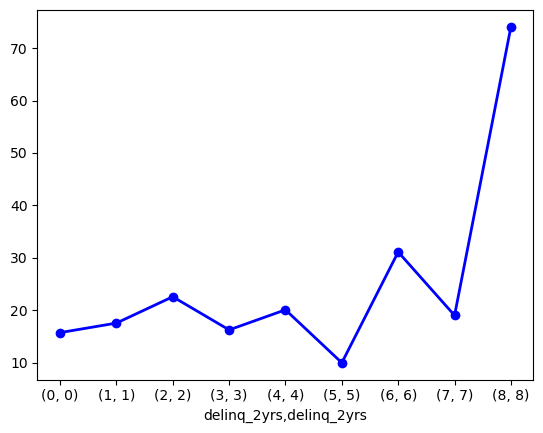

In [372]:
temp = df2[['id', 'delinq_2yrs', 'loan_status', 'loan_amnt']]

plt.figure(figsize=(15,6))
sns.barplot(data=temp, x='delinq_2yrs', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['delinq_2yrs','loan_status'])['loan_amnt'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('delinq_2yrs').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

## Conclusion on delinq_2yrs

##### As a general trend, although higher incidences of delinquency in 2yrs seems to be an indicator of higher default rate, but due to very limited data points in higher delinquency buckets, it is inconclusive

## Default Rate by Loan size

##### Are borrowers with higher loan_amt more likely to make default

id             0
loan_status    0
loan_amnt      0
dtype: int64

Variable Statistics

count    37489.000000
mean     10408.101043
std       6398.162546
min        500.000000
25%       5000.000000
50%       9250.000000
75%      14975.000000
max      29550.000000
Name: loan_amnt, dtype: float64
   loan_amnt bucket
0       5000     Q2
1       2500     Q1
2       2400     Q1
3      10000     Q6
5       5000     Q2


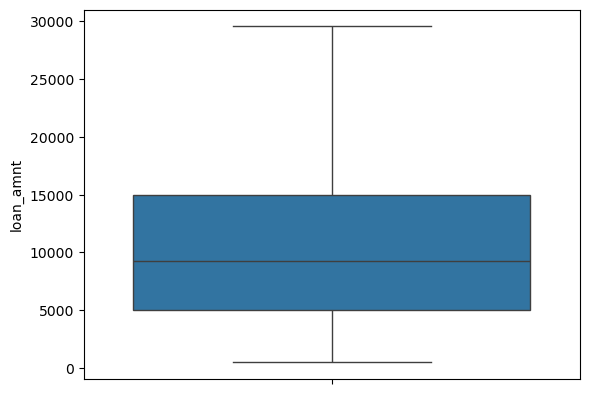

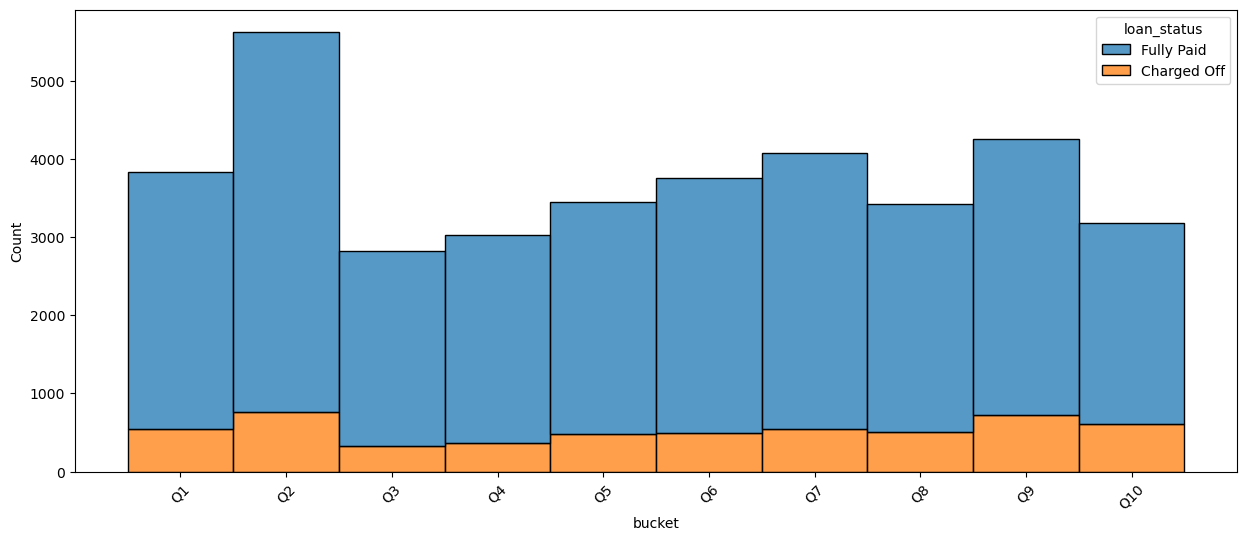

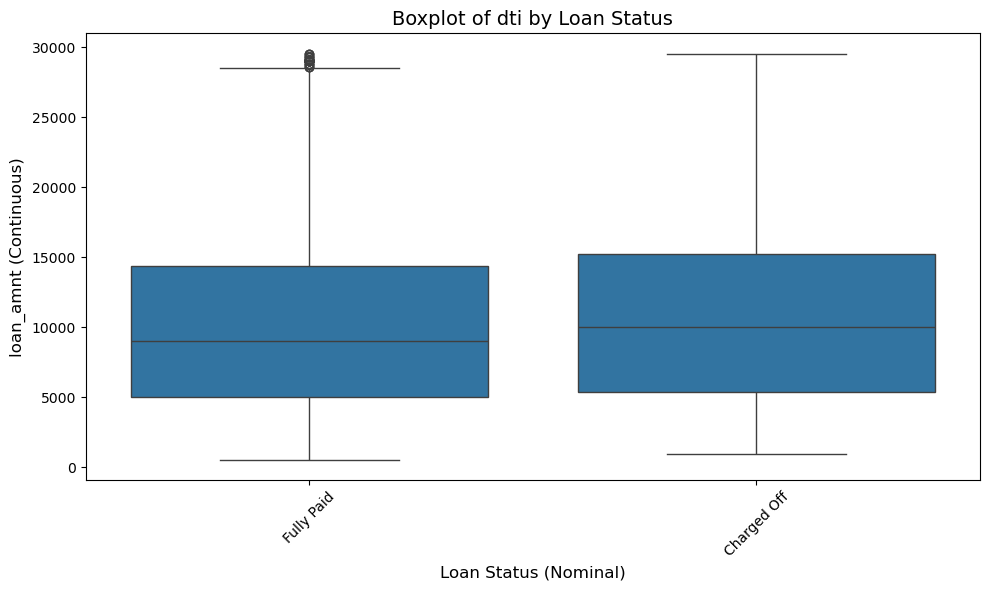


Loan Status by Loan Count

bucket  loan_status
Q1      Charged Off     548
        Fully Paid     3289
Q2      Charged Off     766
        Fully Paid     4869
Q3      Charged Off     330
        Fully Paid     2498
Q4      Charged Off     367
        Fully Paid     2661
Q5      Charged Off     482
        Fully Paid     2971
Q6      Charged Off     499
        Fully Paid     3261
Q7      Charged Off     539
        Fully Paid     3539
Q8      Charged Off     503
        Fully Paid     2928
Q9      Charged Off     728
        Fully Paid     3528
Q10     Charged Off     613
        Fully Paid     2570
Name: id, dtype: int64

Default Rate (in percentage)

bucket  bucket
Q1      Q1        14.281991
Q2      Q2        13.593611
Q3      Q3        11.669024
Q4      Q4        12.120211
Q5      Q5        13.958876
Q6      Q6        13.271277
Q7      Q7        13.217263
Q8      Q8        14.660449
Q9      Q9        17.105263
Q10     Q10       19.258561
Name: id, dtype: float64


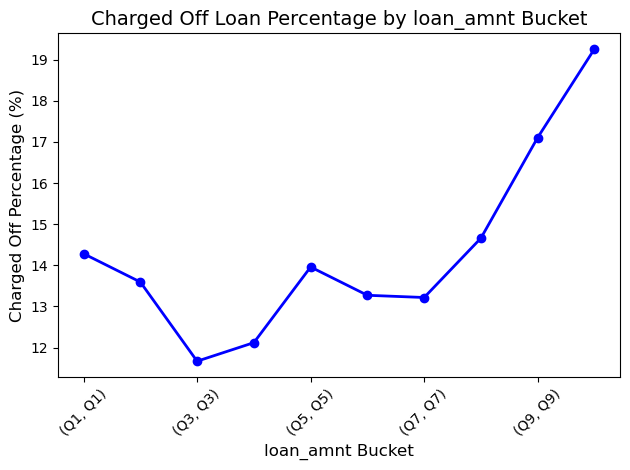


Bin Ranges:
Bucket 1: 500.0 to 3000.0
Bucket 2: 3000.0 to 5000.0
Bucket 3: 5000.0 to 6000.0
Bucket 4: 6000.0 to 7500.0
Bucket 5: 7500.0 to 9250.0
Bucket 6: 9250.0 to 10500.0
Bucket 7: 10500.0 to 13000.0
Bucket 8: 13000.0 to 15250.0
Bucket 9: 15250.0 to 20000.0
Bucket 10: 20000.0 to 29550.0


In [375]:
temp = df2[['id', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

#sns.boxplot(temp['annual_inc'])

# Calculate the IQR (Interquartile Range)
Q1 = temp['loan_amnt'].quantile(0.25)  # 25th percentile
Q3 = temp['loan_amnt'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['loan_amnt'] >= lower_bound) & (temp['loan_amnt'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['loan_amnt'].describe())

sns.boxplot(temp['loan_amnt'])

# Create 4 buckets based on quartiles (percentile-based)
temp['bucket'], bin_intervals = pd.qcut(temp['loan_amnt'], q=10, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10'], retbins=True)

# View the new column
print(temp[['loan_amnt', 'bucket']].head())

# visualisation
plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='bucket', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Boxplot of annual income by loan status
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='loan_amnt', data=temp)

# Set labels and title
plt.xlabel('Loan Status (Nominal)', fontsize=12)
plt.ylabel('loan_amnt (Continuous)', fontsize=12)
plt.title('Boxplot of dti by Loan Status', fontsize=14)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['bucket','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'income_bucket' values
plt.xlabel('loan_amnt Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by loan_amnt Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

## Conclusion on relationship between default rate and loan size

##### For small loan amounts, no correlation seems to exist between loan amount and default rate but for loan amount higher than certain threshold (\~15,000), tendency to default increases with loan amount

## Default Rate by Total credit revolving balance

##### Total credit revolving balance - Defualt Rate on Loan Count

id             0
revol_bal      0
loan_status    0
loan_amnt      0
dtype: int64

Variable Statistics

count    36154.000000
mean     10136.680257
std       8474.775240
min          0.000000
25%       3367.000000
50%       8035.000000
75%      14848.750000
max      36793.000000
Name: revol_bal, dtype: float64


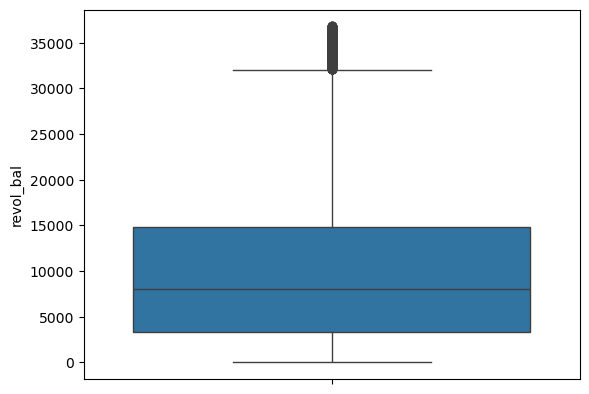

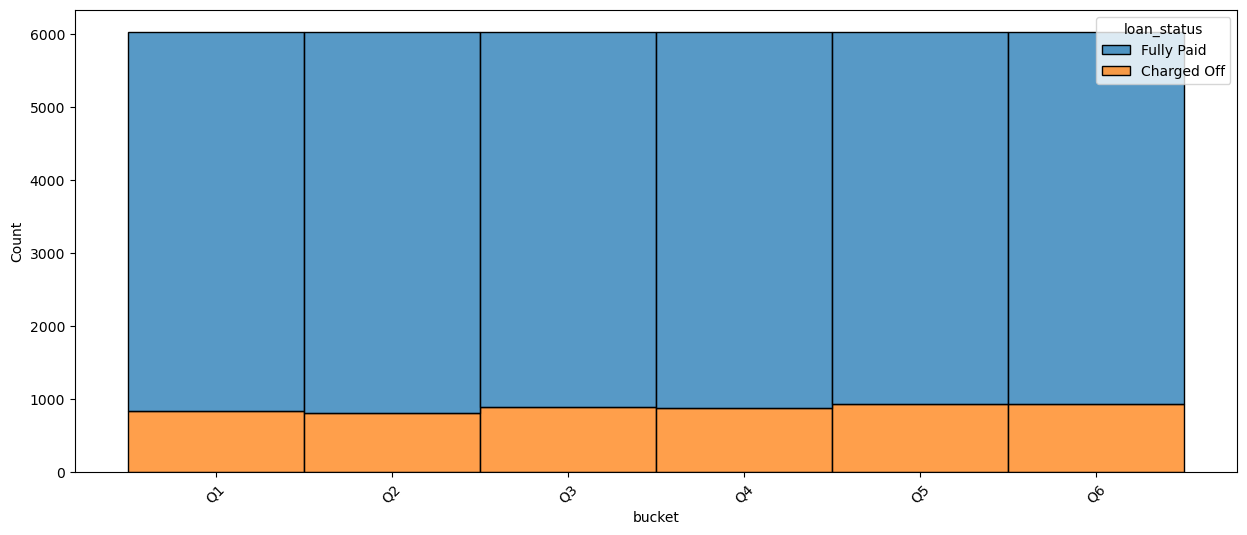

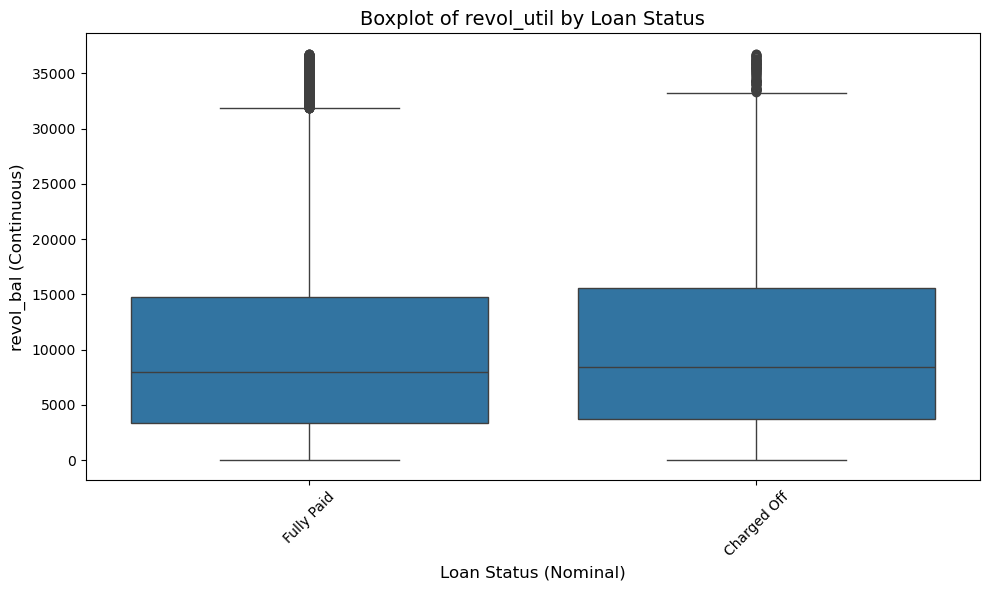


Loan Status by Loan Count

bucket  loan_status
Q1      Charged Off     830
        Fully Paid     5198
Q2      Charged Off     811
        Fully Paid     5212
Q3      Charged Off     882
        Fully Paid     5145
Q4      Charged Off     874
        Fully Paid     5150
Q5      Charged Off     936
        Fully Paid     5091
Q6      Charged Off     936
        Fully Paid     5089
Name: id, dtype: int64

Default Rate (in percentage)

bucket  bucket
Q1      Q1        13.769078
Q2      Q2        13.465051
Q3      Q3        14.634146
Q4      Q4        14.508632
Q5      Q5        15.530114
Q6      Q6        15.535270
Name: id, dtype: float64


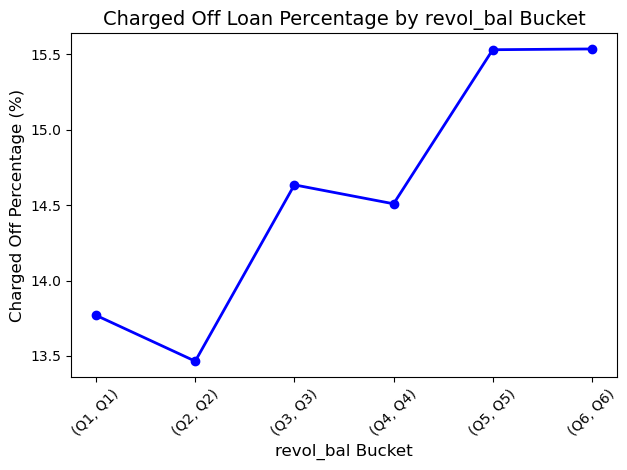


Bin Ranges:
Bucket 1: 0.0 to 2054.0
Bucket 2: 2054.0 to 4807.999999999998
Bucket 3: 4807.999999999998 to 8035.0
Bucket 4: 8035.0 to 12156.999999999996
Bucket 5: 12156.999999999996 to 18505.0
Bucket 6: 18505.0 to 36793.0


In [379]:
temp = df2[['id', 'revol_bal', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['revol_bal'].quantile(0.25)  # 25th percentile
Q3 = temp['revol_bal'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['revol_bal'] >= lower_bound) & (temp['revol_bal'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['revol_bal'].describe())

sns.boxplot(temp['revol_bal'])

# Create 4 buckets based on quartiles (percentile-based)
temp['bucket'], bin_intervals = pd.qcut(temp['revol_bal'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)


# visualisation
plt.figure(figsize=(15,6))
sns.histplot(data=temp, x='bucket', hue='loan_status', multiple='stack', stat='count')
plt.xticks(rotation=45)
plt.show()

# Boxplot of by loan status
plt.figure(figsize=(10,6))
sns.boxplot(x='loan_status', y='revol_bal', data=temp)

# Set labels and title
plt.xlabel('Loan Status (Nominal)', fontsize=12)
plt.ylabel('revol_bal (Continuous)', fontsize=12)
plt.title('Boxplot of revol_util by Loan Status', fontsize=14)

# Show the plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Default rate by Loan Count
loan_count = temp.groupby(['bucket','loan_status'])['id'].count()
loan_percentage = loan_count.groupby('bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Count\n' + '\033[0m')
print(loan_count)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'bucket' values
plt.xlabel('revol_bal Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by revol_bal Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

##### Total credit revolving balance - Default Rate on Loan Amount

id             0
revol_bal      0
loan_status    0
loan_amnt      0
dtype: int64

Variable Statistics

count    36154.000000
mean     10136.680257
std       8474.775240
min          0.000000
25%       3367.000000
50%       8035.000000
75%      14848.750000
max      36793.000000
Name: revol_bal, dtype: float64


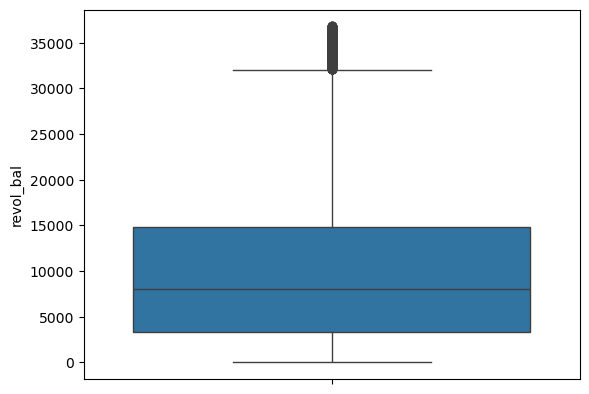

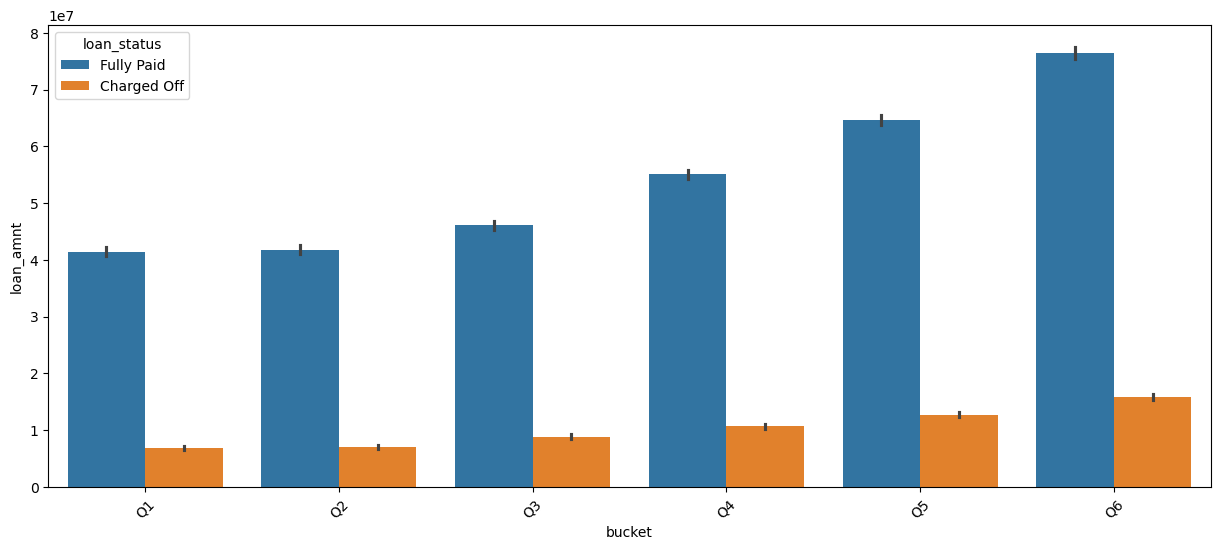


Loan Status by Loan Amount

bucket  loan_status
Q1      Charged Off     548553761
        Fully Paid     3354293842
Q2      Charged Off     551372369
        Fully Paid     3472167665
Q3      Charged Off     619565158
        Fully Paid     3486313350
Q4      Charged Off     636977785
        Fully Paid     3533471980
Q5      Charged Off     672783456
        Fully Paid     3517671335
Q6      Charged Off     663136173
        Fully Paid     3453218479
Name: id, dtype: int64

Default Rate (in percentage)

bucket  bucket
Q1      Q1        14.055219
Q2      Q2        13.703663
Q3      Q3        15.089710
Q4      Q4        15.273599
Q5      Q5        16.055142
Q6      Q6        16.109792
Name: id, dtype: float64


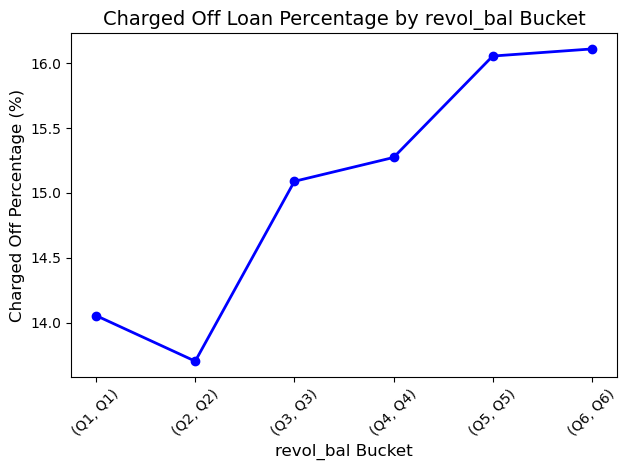


Bin Ranges:
Bucket 1: 0.0 to 2054.0
Bucket 2: 2054.0 to 4807.999999999998
Bucket 3: 4807.999999999998 to 8035.0
Bucket 4: 8035.0 to 12156.999999999996
Bucket 5: 12156.999999999996 to 18505.0
Bucket 6: 18505.0 to 36793.0


In [381]:
temp = df2[['id', 'revol_bal', 'loan_status', 'loan_amnt']]
print(temp.isnull().sum())

# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['revol_bal'].quantile(0.25)  # 25th percentile
Q3 = temp['revol_bal'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['revol_bal'] >= lower_bound) & (temp['revol_bal'] <= upper_bound)]
print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['revol_bal'].describe())

sns.boxplot(temp['revol_bal'])

# Create 4 buckets based on quartiles (percentile-based)
temp['bucket'], bin_intervals = pd.qcut(temp['revol_bal'], q=6, labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6'], retbins=True)

# visualisation
plt.figure(figsize=(15,6))
sns.barplot(data=temp, x='bucket', hue='loan_status', y='loan_amnt', estimator='sum')
plt.xticks(rotation=45)
plt.show()

# Default rate by Loan Amount
loan_amnt_sum = temp.groupby(['bucket','loan_status'])['id'].sum()
loan_amnt_percentage = loan_amnt_sum.groupby('bucket').apply(lambda x: 100 * x / float(x.sum()))
charged_off_percentage = loan_amnt_percentage.xs('Charged Off', level='loan_status')
print('\033[1;4m' + '\nLoan Status by Loan Amount\n' + '\033[0m')
print(loan_amnt_sum)
print('\033[1;4m' + '\nDefault Rate (in percentage)\n' + '\033[0m')
print(charged_off_percentage)
charged_off_percentage.plot(kind='line', marker='o', linestyle='-', color='b', linewidth=2)

# Set x-axis labels as the 'bucket' values
plt.xlabel('revol_bal Bucket', fontsize=12)
plt.ylabel('Charged Off Percentage (%)', fontsize=12)

# Set title
plt.title('Charged Off Loan Percentage by revol_bal Bucket', fontsize=14)

# Rotate x-axis labels if needed for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


# Get the actual bin intervals (ranges)
print("\nBin Ranges:")
for i in range(len(bin_intervals) - 1):
    print(f"Bucket {i + 1}: {bin_intervals[i]} to {bin_intervals[i + 1]}")

## Conclusion on Total credit revolving balance

##### No strong correlation of default behaviour is observed with revolving balance

## Recovery Rate by Grade

id                 0
grade              0
loan_status        0
loan_amnt          0
total_rec_prncp    0
recoveries         0
dtype: int64

Variable Statistics

count    5046.000000
mean        4.532888
std         4.808039
min         0.000000
25%         0.000000
50%         4.502008
75%         5.749327
max        17.634681
Name: recovery_rate, dtype: float64
['A' 'B' 'C' 'D' 'E' 'F' 'G']


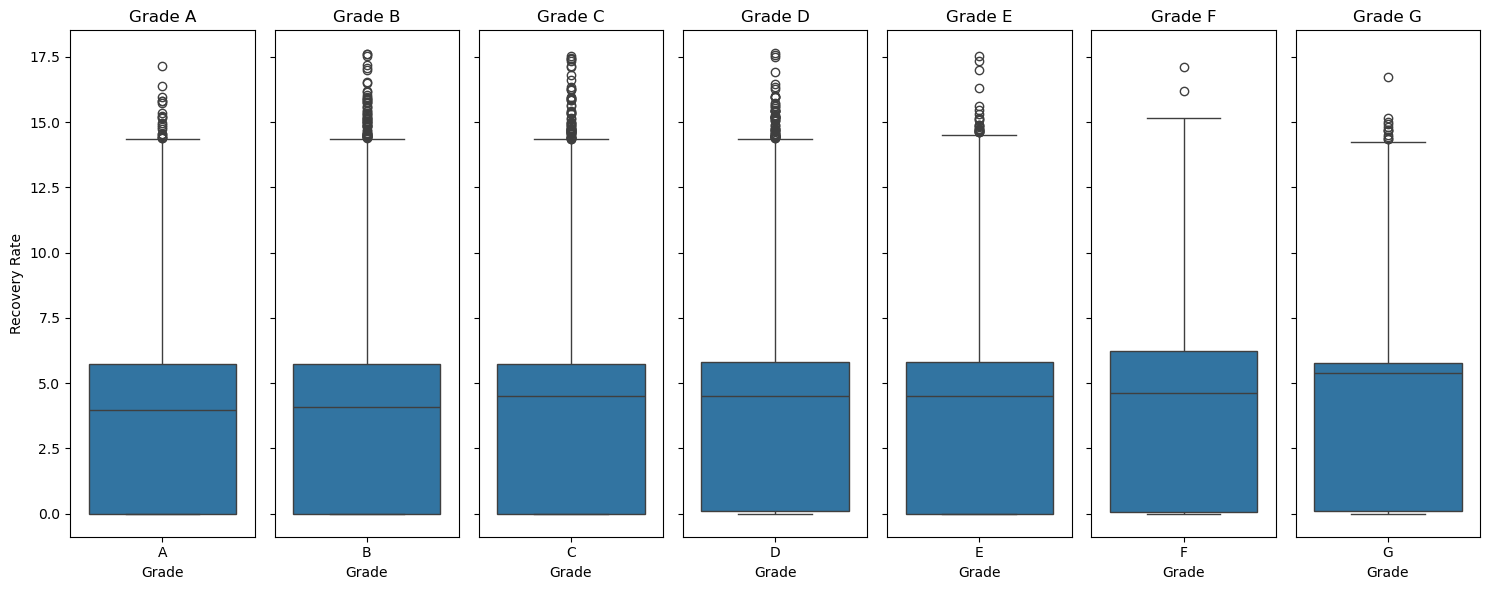

In [384]:
temp = df2[['id', 'grade', 'loan_status', 'loan_amnt', 'total_rec_prncp', 'recoveries']]
temp = temp[temp['loan_status']=='Charged Off']
print(temp.isnull().sum())
temp['recovery_rate'] = temp['recoveries'] / (temp['loan_amnt'] - temp['total_rec_prncp'])*100

print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
temp['recovery_rate'].describe()


# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['recovery_rate'].quantile(0.25)  # 25th percentile
Q3 = temp['recovery_rate'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['recovery_rate'] >= lower_bound) & (temp['recovery_rate'] <= upper_bound)]
print(temp['recovery_rate'].describe())

# Define the number of unique grades
grades = np.sort(temp['grade'].unique())
print(grades)

# Create subplots, one for each grade
fig, axes = plt.subplots(nrows=1, ncols=len(grades), figsize=(15, 6), sharey=True)

# Loop through the grades and create a boxplot for each grade in a separate subplot
for i, grade in enumerate(grades):
    sns.boxplot(x='grade', y='recovery_rate', data=temp[temp['grade'] == grade], ax=axes[i])
    axes[i].set_title(f"Grade {grade}")
    axes[i].set_xlabel('Grade')
    axes[i].set_ylabel('Recovery Rate')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

## Conclusion on relationship between Grade and Interest Rate

##### No correlation of recovery rate is observed with grade

## Recovery Rate by Purpose

id                 0
purpose            0
loan_status        0
loan_amnt          0
total_rec_prncp    0
recoveries         0
dtype: int64

Variable Statistics

count    5046.000000
mean        4.532888
std         4.808039
min         0.000000
25%         0.000000
50%         4.502008
75%         5.749327
max        17.634681
Name: recovery_rate, dtype: float64


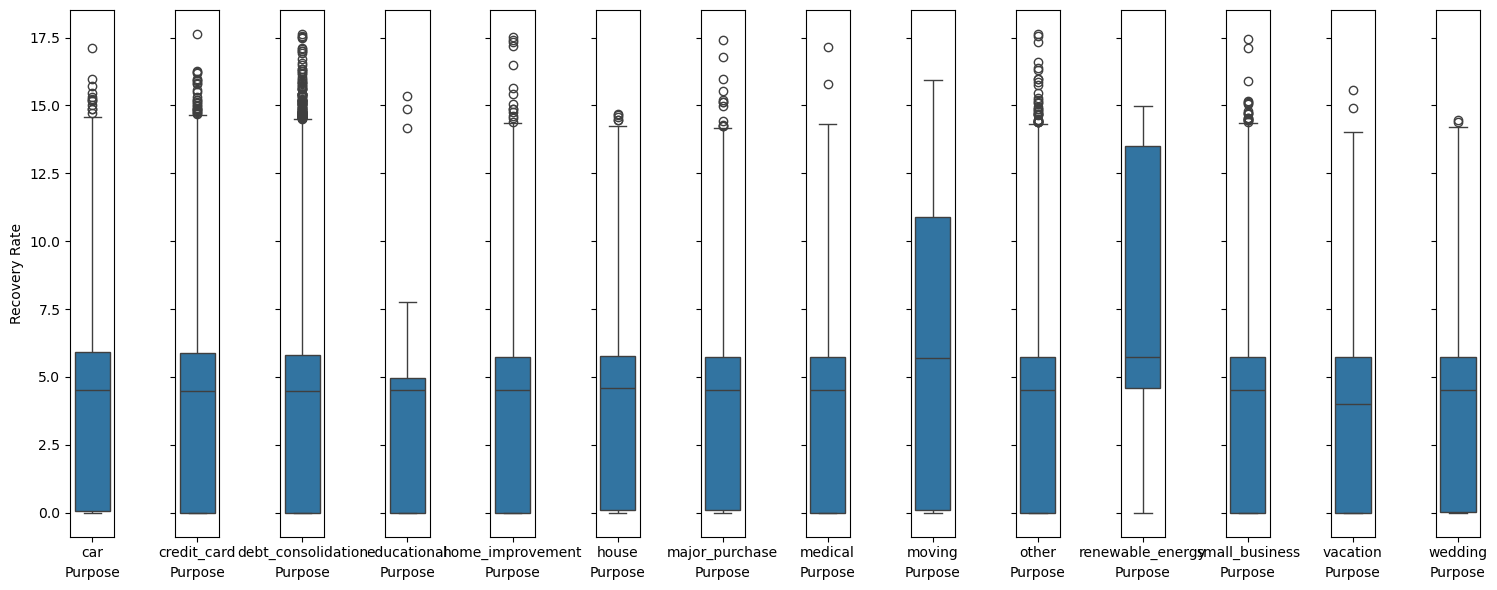

In [387]:
temp = df2[['id', 'purpose', 'loan_status', 'loan_amnt', 'total_rec_prncp', 'recoveries']]
temp = temp[temp['loan_status']=='Charged Off']
print(temp.isnull().sum())
temp['recovery_rate'] = temp['recoveries'] / (temp['loan_amnt'] - temp['total_rec_prncp'])*100

print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
temp['recovery_rate'].describe()


# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['recovery_rate'].quantile(0.25)  # 25th percentile
Q3 = temp['recovery_rate'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['recovery_rate'] >= lower_bound) & (temp['recovery_rate'] <= upper_bound)]
print(temp['recovery_rate'].describe())

# Define the number of unique purpose
purposes = np.sort(temp['purpose'].unique())

# Create subplots, one for each purpose
fig, axes = plt.subplots(nrows=1, ncols=len(purposes), figsize=(15, 6), sharey=True)

# Loop through the purposes and create a boxplot for each purpose in a separate subplot
for i, purpose in enumerate(purposes):
    sns.boxplot(x='purpose', y='recovery_rate', data=temp[temp['purpose'] == purpose], ax=axes[i])

    axes[i].set_xlabel('Purpose')
    axes[i].set_ylabel('Recovery Rate')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

## Conclusion on relationship between Purpose and Recovery Rate

##### Although recovery rate appears relatively higher for renewables and moving purpose, but no strong correlation of recovery rate is observed with Purpose

## Recovery Rate by Home Ownership

id                 0
home_ownership     0
loan_status        0
loan_amnt          0
total_rec_prncp    0
recoveries         0
dtype: int64

Variable Statistics

count    5046.000000
mean        4.532888
std         4.808039
min         0.000000
25%         0.000000
50%         4.502008
75%         5.749327
max        17.634681
Name: recovery_rate, dtype: float64
['MORTGAGE' 'OTHER' 'OWN' 'RENT']


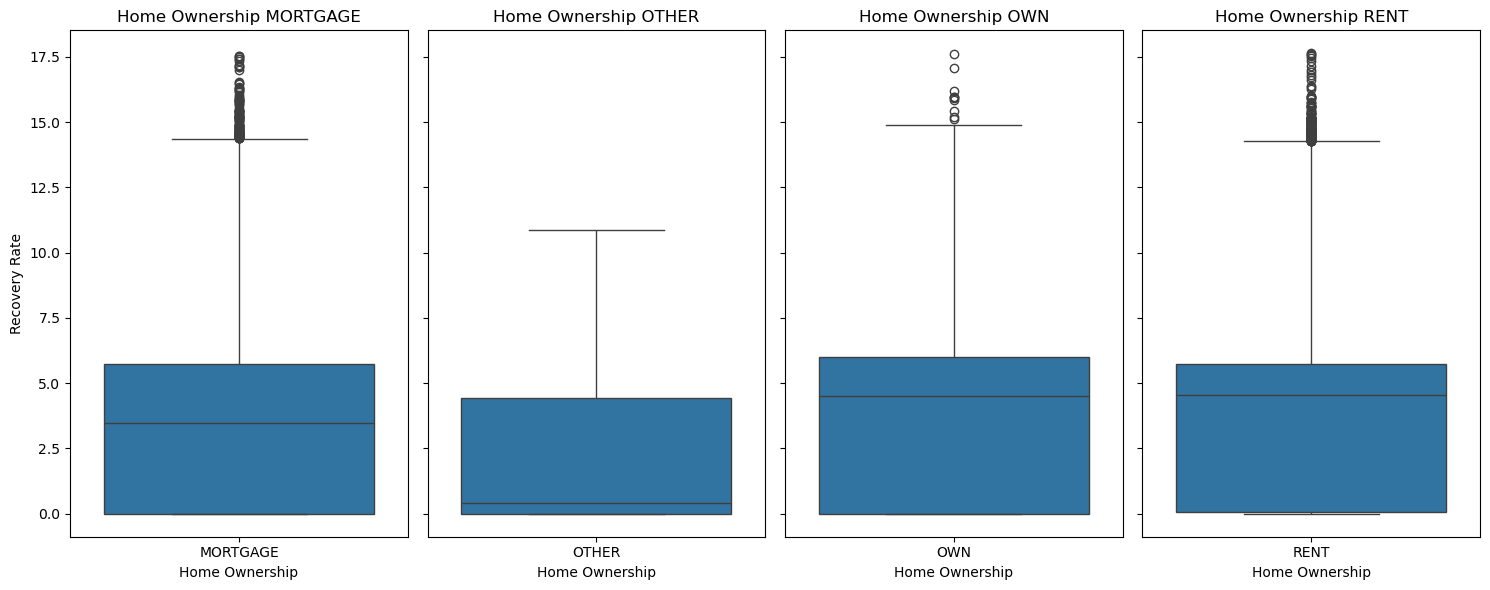

In [390]:
temp = df2[['id', 'home_ownership', 'loan_status', 'loan_amnt', 'total_rec_prncp', 'recoveries']]
temp = temp[temp['loan_status']=='Charged Off']
print(temp.isnull().sum())
temp['recovery_rate'] = temp['recoveries'] / (temp['loan_amnt'] - temp['total_rec_prncp'])*100
temp['recovery_rate'].describe()


# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['recovery_rate'].quantile(0.25)  # 25th percentile
Q3 = temp['recovery_rate'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['recovery_rate'] >= lower_bound) & (temp['recovery_rate'] <= upper_bound)]

print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['recovery_rate'].describe())

# Define the number of unique home_ownership
ho = np.sort(temp['home_ownership'].unique())
print(ho)

# Create subplots, one for each home_ownership
fig, axes = plt.subplots(nrows=1, ncols=len(ho), figsize=(15, 6), sharey=True)

# Loop through the home_ownership and create a boxplot for each home_ownership in a separate subplot
for i, x in enumerate(ho):
    sns.boxplot(x='home_ownership', y='recovery_rate', data=temp[temp['home_ownership'] == x], ax=axes[i])
    axes[i].set_title(f"Home Ownership {x}")
    axes[i].set_xlabel('Home Ownership')
    axes[i].set_ylabel('Recovery Rate')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

## Conclusion on relationship between Home Ownership and Recovery Rate

##### Recovery Rate is significantly lower for ‘OTHER’ home ownership category. But due to very limited data points for ‘OTHER’ category, there is no enough evidence to conclude anything

## Recovery Rate by Annual Income

In [393]:
temp = df2[['id', 'annual_inc', 'loan_status', 'loan_amnt', 'total_rec_prncp', 'recoveries']]
temp = temp[temp['loan_status']=='Charged Off']
print(temp.isnull().sum())
temp['recovery_rate'] = temp['recoveries'] / (temp['loan_amnt'] - temp['total_rec_prncp'])*100

# Remove outliers for Annual Income

# Calculate the IQR (Interquartile Range)
Q1 = temp['annual_inc'].quantile(0.25)  # 25th percentile
Q3 = temp['annual_inc'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['annual_inc'] >= lower_bound) & (temp['annual_inc'] <= upper_bound)]

print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['annual_inc'].describe())


# Remove outliers for Recovery Rate

# Calculate the IQR (Interquartile Range)
Q1 = temp['recovery_rate'].quantile(0.25)  # 25th percentile
Q3 = temp['recovery_rate'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['recovery_rate'] >= lower_bound) & (temp['recovery_rate'] <= upper_bound)]

print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['recovery_rate'].describe())

# Find Correlation
print('\033[1;4m' + '\nCorrelation between Annual Income and Recovery Rate is ' + str(round(temp['recovery_rate'].corr(temp['annual_inc'])*100)) + "%" + '\033[0m')

id                 0
annual_inc         0
loan_status        0
loan_amnt          0
total_rec_prncp    0
recoveries         0
dtype: int64

Variable Statistics

count      5367.000000
mean      55676.891137
std       25516.521797
min        4080.000000
25%       36000.000000
50%       51200.000000
75%       70000.000000
max      132000.000000
Name: annual_inc, dtype: float64

Variable Statistics

count    4806.000000
mean        4.447245
std         4.716641
min         0.000000
25%         0.000000
50%         4.500514
75%         5.746951
max        16.386755
Name: recovery_rate, dtype: float64

Correlation between Annual Income and Recovery Rate is -3%


## Conclusion on relationship between Annual Income and Recovery Rate

##### No correlation exists between annual income and recovery rate

#### Recovery Rate by Verification Status

id                     0
verification_status    0
loan_status            0
loan_amnt              0
total_rec_prncp        0
recoveries             0
dtype: int64

Variable Statistics

count    5046.000000
mean        4.532888
std         4.808039
min         0.000000
25%         0.000000
50%         4.502008
75%         5.749327
max        17.634681
Name: recovery_rate, dtype: float64
['Not Verified' 'Source Verified' 'Verified']


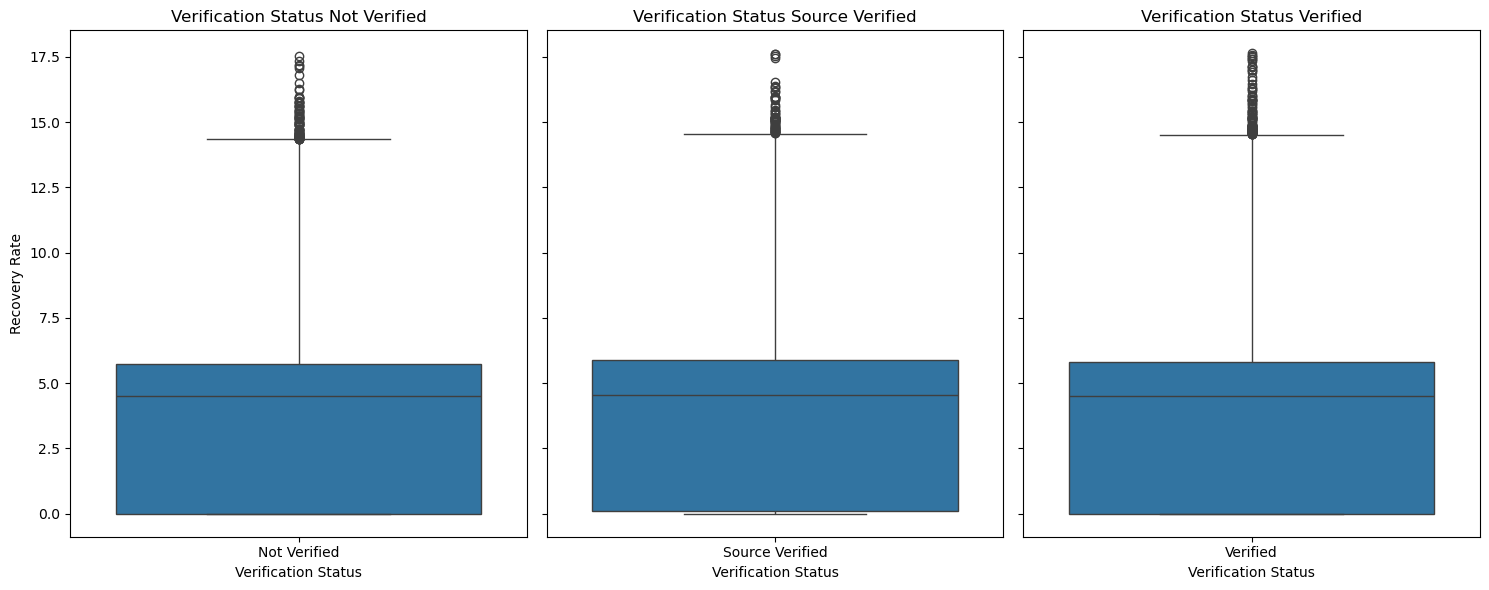

In [396]:
temp = df2[['id', 'verification_status', 'loan_status', 'loan_amnt', 'total_rec_prncp', 'recoveries']]
temp = temp[temp['loan_status']=='Charged Off']
print(temp.isnull().sum())
temp['recovery_rate'] = temp['recoveries'] / (temp['loan_amnt'] - temp['total_rec_prncp'])*100
temp['recovery_rate'].describe()


# Remove outliers

# Calculate the IQR (Interquartile Range)
Q1 = temp['recovery_rate'].quantile(0.25)  # 25th percentile
Q3 = temp['recovery_rate'].quantile(0.75)  # 75th percentile
IQR = Q3 - Q1

# Define bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
temp = temp[(temp['recovery_rate'] >= lower_bound) & (temp['recovery_rate'] <= upper_bound)]

print('\033[1;4m' + '\nVariable Statistics\n' + '\033[0m')
print(temp['recovery_rate'].describe())

# Define the number of unique verification_status
vs = np.sort(temp['verification_status'].unique())
print(vs)

# Create subplots, one for each verification_status
fig, axes = plt.subplots(nrows=1, ncols=len(vs), figsize=(15, 6), sharey=True)

# Loop through the verification_status and create a boxplot for each grade in a separate subplot
for i, x in enumerate(vs):
    sns.boxplot(x='verification_status', y='recovery_rate', data=temp[temp['verification_status'] == x], ax=axes[i])
    axes[i].set_title(f"Verification Status {x}")
    axes[i].set_xlabel('Verification Status')
    axes[i].set_ylabel('Recovery Rate')

# Adjust the layout for better spacing
plt.tight_layout()
plt.show()

## Conclusion on relationship between Verification Status and Recovery Rate

##### No correlation of recovery rate is observed with Verification Status